# ***EXPLORATORY DATA ANALYSIS FEDEX LOGISTICS***
BY- DAKSH VANSHAJ
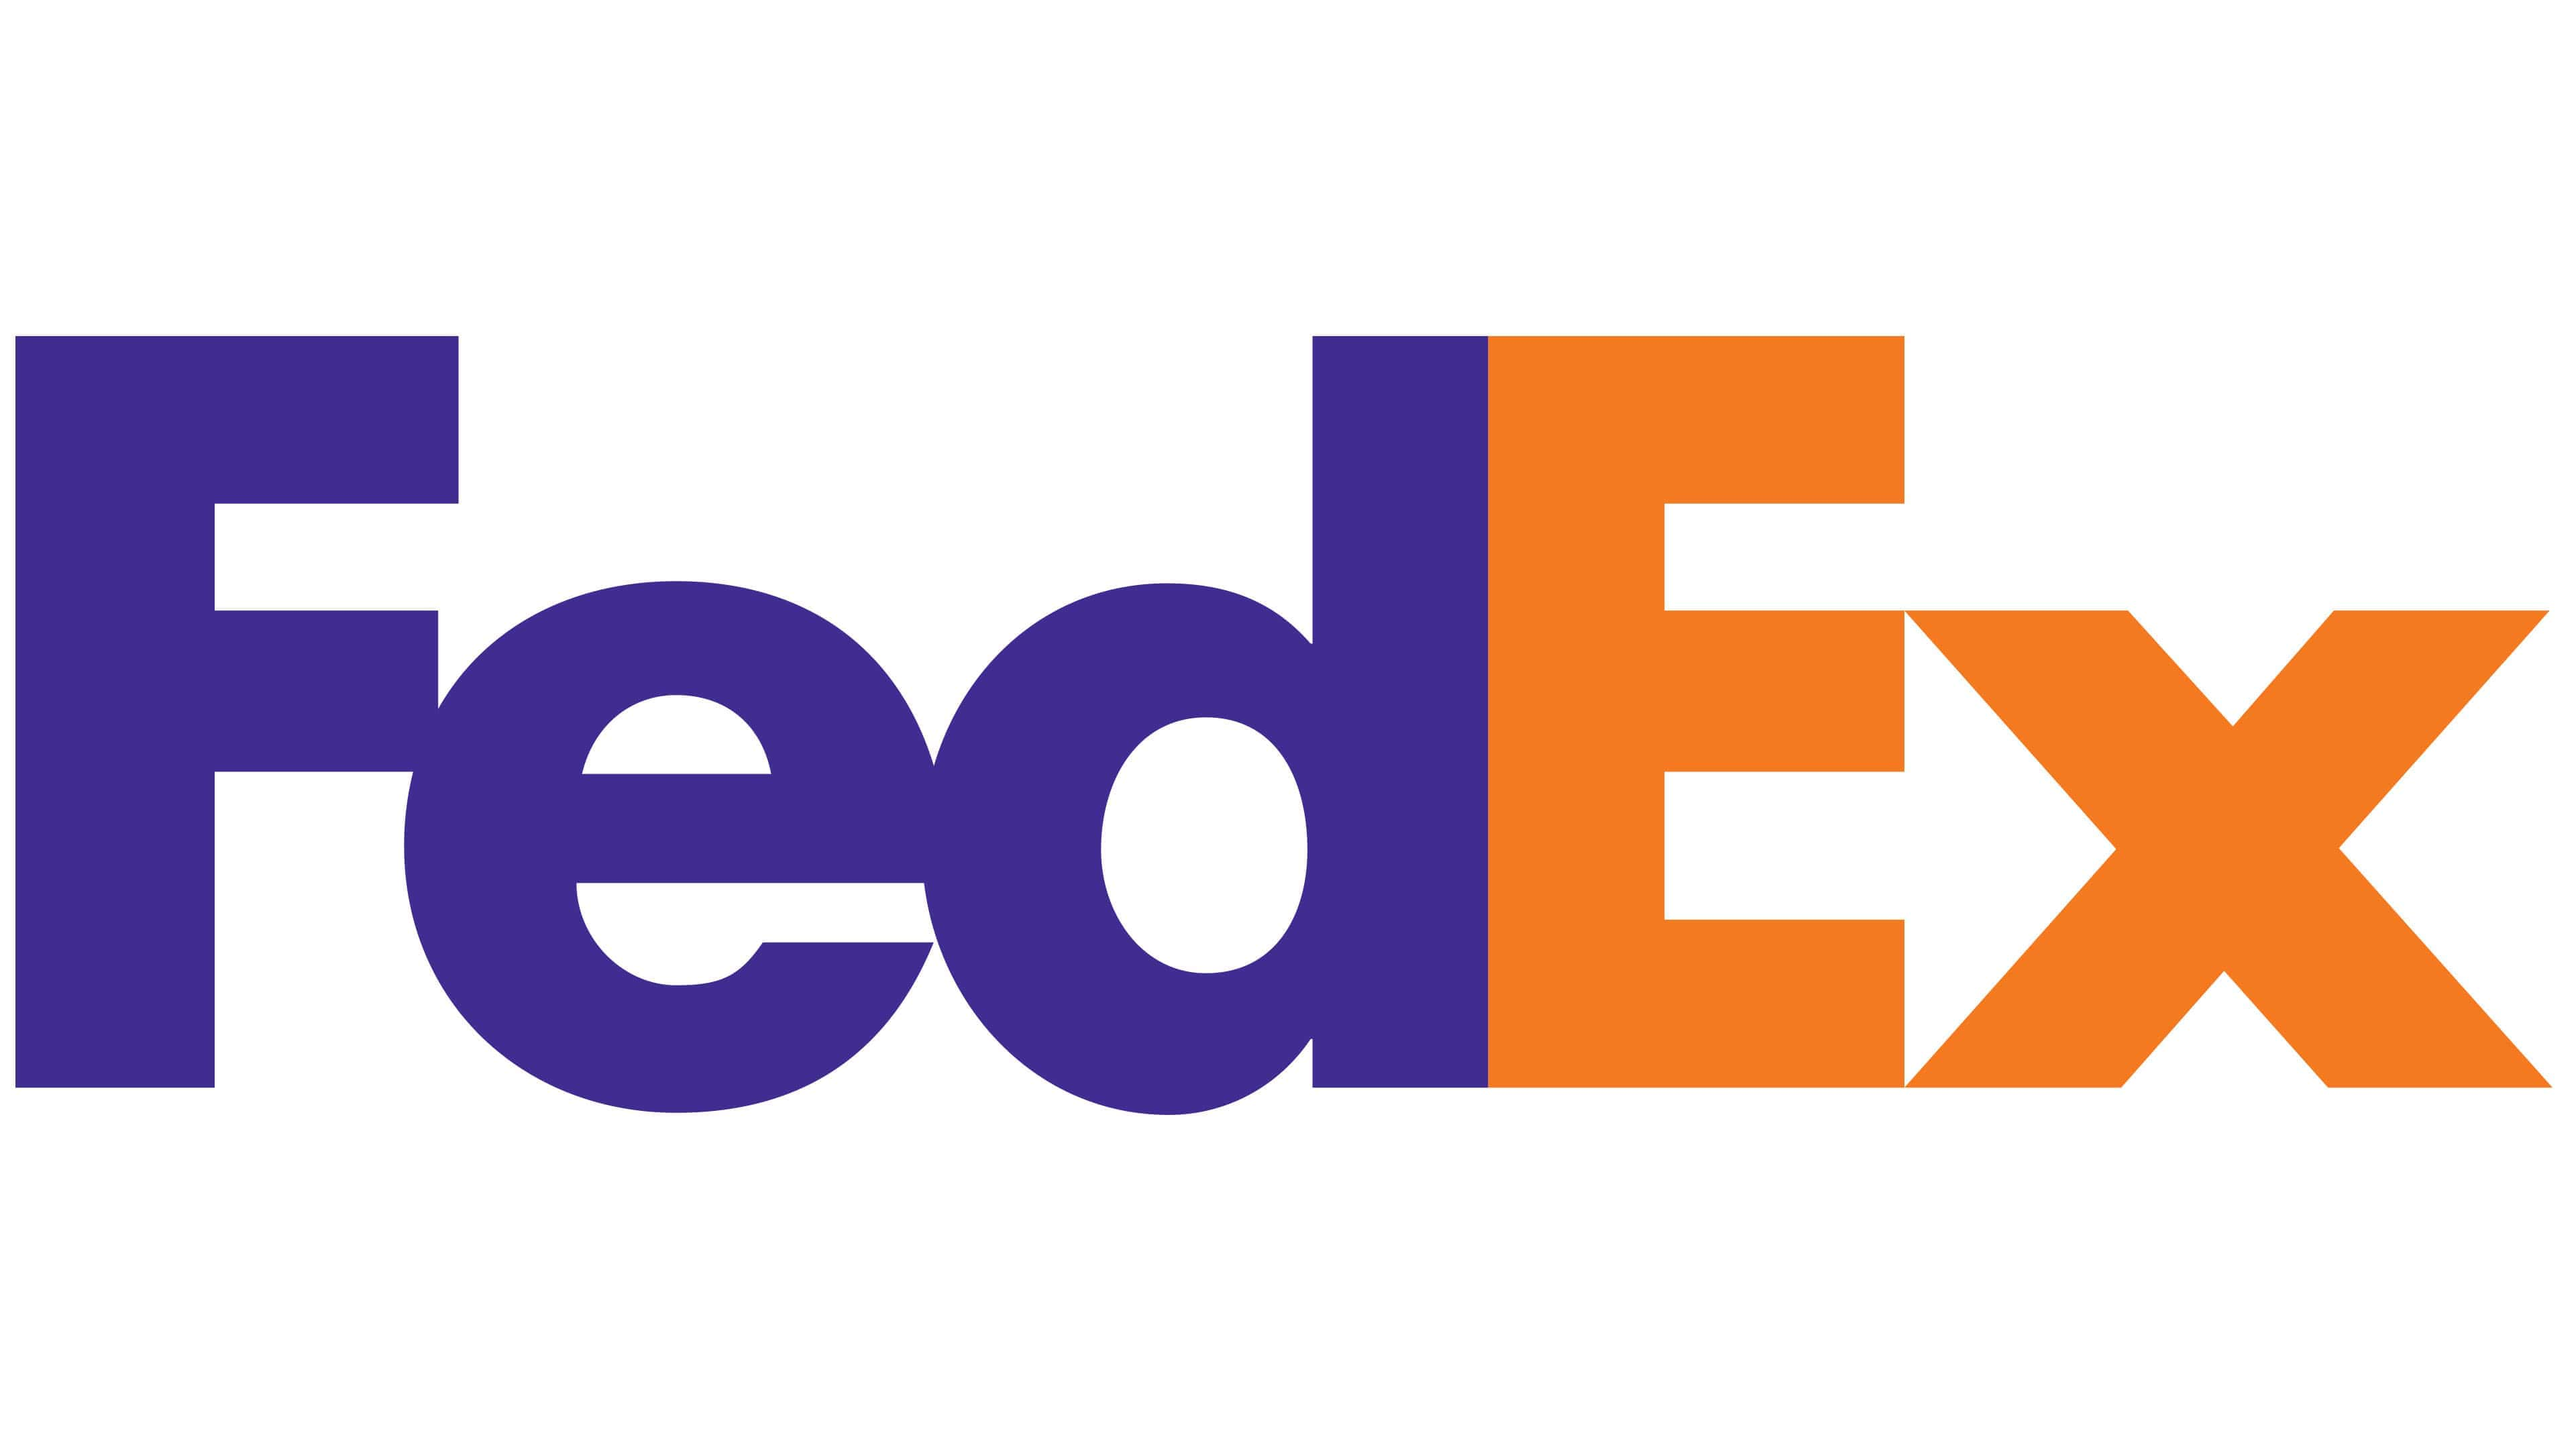


## **Business Context**

<p align="justify">FedEx Logistics manages a complex global supply chain, dealing with shipments across various regions, countries, and industries. This dataset provides an in-depth look at their logistics processes, capturing important information on purchase orders (POs), shipment methods, vendor agreements (INCO terms), delivery schedules, and product-specific details such as item descriptions and dosage forms. Effective management of these processes ensures timely delivery, minimizes freight costs, and improves customer satisfaction.
</p>

##  **Problem Statement**
<p align="justify">
FedEx Logistics aims to streamline supply chain operations, improving delivery timelines and reducing costs for both the company and its customers.
</p>

In [ ]:
! git config --global user.name "vanshajAI"
! git config --global user.email "davevanshaj55646@gmail.com"
! git config --global user.password "Avengers@51"

## Reading the dataset







In [ ]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
import seaborn as sns
from scipy.stats import skew


In [ ]:
# display all columns
pd.set_option("display.max_columns", None)

In [ ]:
#Reading the required dataset using drive download link
url ="https://drive.usercontent.google.com/u/0/uc?id=1G3sg45qaljQ9w-bB5i4-n7QAM59cR4xN&export=download"
df = pd.read_csv(url)

In [ ]:
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


## Dataset Description
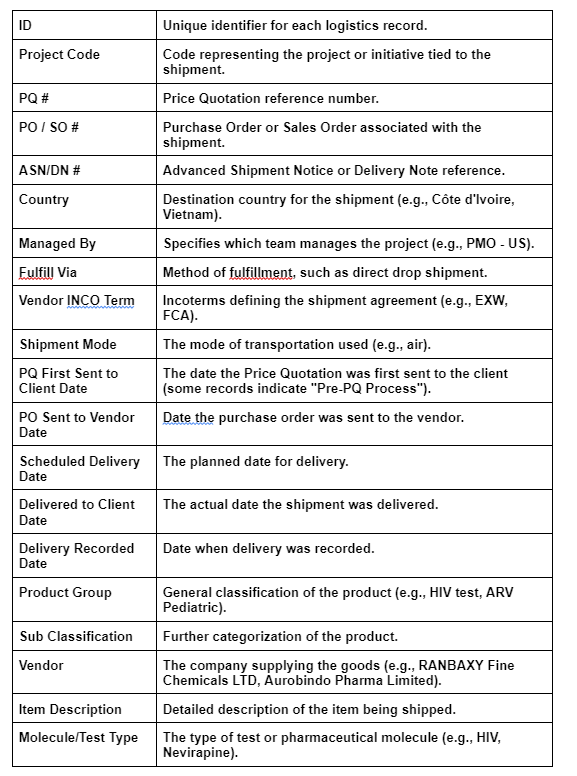

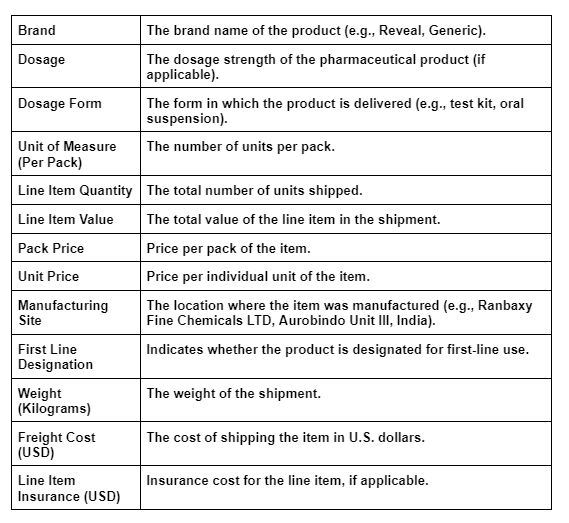

##  Some **Hypothesis/Assumptions**

1. Do some countries face more delays that others.
2. How the mode of shipment affect delivery time.
3. Are shipments managed by specific teams more likely to reach on time.
4. Which factor is responsible for increasing line item insurance cost.
5. Which factor is responsible for increasing freight cost.
6. Does the type of INCO term impact delivery.
7. How the delivery performance varies with the time taken for scheduling delivery.


## Data Wrangling
- Cleaning and optimizing datatypes for efficient memory usage and plotting meaningfull trends.

In [ ]:
df.shape

(10324, 33)

In [ ]:
# viewing dataset columns
df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [ ]:
# viewing non-null count, dtype using .info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [ ]:
# basic statistical description
df.describe(include = "object")

,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD)
count,10324,10324,10324,10324,10324,10324,10324,10324,9964,10324,10324,10324,10324,10324,10324,10324,10324,10324,10324,10324,8588,10324,10324,10324,10324,10324
unique,142,1237,6233,7030,43,4,2,8,4,765,897,2006,2093,2042,5,6,73,184,86,48,54,17,88,2,4688,6733
top,116-ZA-T30,Pre-PQ Process,SCMS-199289,ASN-19166,South Africa,PMO - US,From RDC,N/A - From RDC,Air,Pre-PQ Process,N/A - From RDC,29-Aug-14,29-Aug-14,29-Aug-14,ARV,Adult,SCMS from RDC,"Efavirenz 600mg, tablets, 30 Tabs",Efavirenz,Generic,300mg,Tablet,"Aurobindo Unit III, India",Yes,Weight Captured Separately,Freight Included in Commodity Cost
freq,768,2681,67,54,1406,10265,5404,5404,6113,2476,5404,97,74,67,8550,6595,5404,755,1125,7285,990,3532,3172,7030,1507,1442


In [ ]:
# null count
df.isnull().sum()

,0
ID,0
Project Code,0
PQ #,0
PO / SO #,0
ASN/DN #,0
Country,0
Managed By,0
Fulfill Via,0
Vendor INCO Term,0
Shipment Mode,360


In [ ]:
# creating a copy of original df dataframe
df_clean = df.copy()

#### **Cleaning "Shipment Mode" Column**

In [ ]:
# checking unique values
df['Shipment Mode'].unique()

array(['Air', nan, 'Truck', 'Air Charter', 'Ocean'], dtype=object)

In [ ]:
# count of values
df['Shipment Mode'].value_counts()

,count
Shipment Mode,
Air,6113
Truck,2830
Air Charter,650
Ocean,371


In [ ]:
# finding the most used mode of shipment
top_mode = df_clean['Shipment Mode'].mode()[0]
top_mode

'Air'

In [ ]:
# filling null values with top_mode
df_clean["Shipment Mode"] = df_clean["Shipment Mode"].fillna(top_mode, axis=0)

In [ ]:
# confirming null values
df_clean["Shipment Mode"].isnull().sum()

0

#### **Cleaning "PQ First Sent to Client Date" Column**


In [ ]:
# converting column to datetime format and non datetype entries to NaT
df_clean["PQ First Sent to Client Date"] = pd.to_datetime(
    df_clean["PQ First Sent to Client Date"],
    format = "%m/%d/%y", # m-month, d-day, y-year without century
    errors="coerce")

# Typecasting to convert column into datetime64[ns]
df_clean["PQ First Sent to Client Date"] = df_clean["PQ First Sent to Client Date"].astype("datetime64[ns]")

In [ ]:
df_clean["PQ First Sent to Client Date"].isnull().sum()

2681

In [ ]:
# converting column to datetime format and non datetype entries to NaT
df_clean["PO Sent to Vendor Date"] = pd.to_datetime(
    df_clean["PO Sent to Vendor Date"],
    format = "%m/%d/%y",
    errors="coerce")

# Typecasting to convert column into datetime64[ns]
df_clean["PO Sent to Vendor Date"] = df_clean["PO Sent to Vendor Date"].astype("datetime64[ns]")

In [ ]:
df_clean["PO Sent to Vendor Date"].isnull().sum()

5732

In [ ]:
# converting column to datetime format and non datetype entries to NaT
df_clean["Scheduled Delivery Date"] = pd.to_datetime(
    df_clean["Scheduled Delivery Date"],
    format = "%d-%b-%y", # d- day, b-abbriviated month, y-year without century(eg 24 for 2024)
    errors="coerce")

# Typecasting to convert column into datetime64[ns]
df_clean["Scheduled Delivery Date"] = df_clean["Scheduled Delivery Date"].astype("datetime64[ns]")

In [ ]:
df_clean["Scheduled Delivery Date"].isnull().sum()

0

In [ ]:
# converting column to datetime format and non datetype entries to NaT
df_clean["Delivered to Client Date"] = pd.to_datetime(
    df_clean["Delivered to Client Date"],
    format = "%d-%b-%y",
    errors="coerce")

# Typecasting to convert column into datetime64[ns]
df_clean["Delivered to Client Date"] = df_clean["Delivered to Client Date"].astype("datetime64[ns]")

In [ ]:
df_clean["Delivered to Client Date"].isnull().sum()

0

In [ ]:
# converting column to datetime format and non datetype entries to NaT
df_clean["Delivery Recorded Date"] = pd.to_datetime(
    df_clean["Delivery Recorded Date"],
    format = "%d-%b-%y",
    errors="coerce")

# Typecasting to convert column into datetime64[ns]
df_clean["Delivery Recorded Date"] = df_clean["Delivery Recorded Date"].astype("datetime64[ns]")

In [ ]:
df_clean["Delivery Recorded Date"].isnull().sum()

0

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            10324 non-null  int64         
 1   Project Code                  10324 non-null  object        
 2   PQ #                          10324 non-null  object        
 3   PO / SO #                     10324 non-null  object        
 4   ASN/DN #                      10324 non-null  object        
 5   Country                       10324 non-null  object        
 6   Managed By                    10324 non-null  object        
 7   Fulfill Via                   10324 non-null  object        
 8   Vendor INCO Term              10324 non-null  object        
 9   Shipment Mode                 10324 non-null  object        
 10  PQ First Sent to Client Date  7643 non-null   datetime64[ns]
 11  PO Sent to Vendor Date      

#### **Cleaning dosage column**

In [ ]:
# checking unique values
df_clean['Dosage'].unique()

array([nan, '10mg/ml', '150mg', '30mg', '200mg', '200/50mg', '150/300mg',
       '2g', '300mg', '1mg/ml', '600mg', '25mg', '20mg', '250mg', '400mg',
       '20/120mg', '50+153mg', '600/200/300mg', '100mg', '80/20mg/ml',
       '600mg/2ml', '150/200/30mg', '100/25mg', '50mg', '15mg',
       '300/200mg', '150/300/200mg', '133.3/33.3mg', '80mg/ml', '30/6mg',
       '20mg/ml', '40mg', '300/150/300mg', '500/25mg', '30/50/6mg',
       '150/300+200mg', '150/30mg', '150/200/40mg', '30mg/ml',
       '200/300mg', '150/300+300mg', '300/300mg', '60/100/12mg',
       '600/300/300mg', '300/100mg', '30/60mg', '60/30mg', '30/50/60mg',
       '500mg', '125mg', '600/300mg', '60mg', '60/12mg',
       '150/300mg+600mg', '50mg/g'], dtype=object)

In [ ]:
# checking for most used dosage
dosage_mode = df_clean['Dosage'].mode()[0]
dosage_mode

'300mg'

In [ ]:
# filling null values with dosage_mode due to its categorical nature
df_clean['Dosage'] = df_clean['Dosage'].fillna(dosage_mode)

In [ ]:
# confirming null values are filled
df_clean['Dosage'].isnull().sum()

0

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            10324 non-null  int64         
 1   Project Code                  10324 non-null  object        
 2   PQ #                          10324 non-null  object        
 3   PO / SO #                     10324 non-null  object        
 4   ASN/DN #                      10324 non-null  object        
 5   Country                       10324 non-null  object        
 6   Managed By                    10324 non-null  object        
 7   Fulfill Via                   10324 non-null  object        
 8   Vendor INCO Term              10324 non-null  object        
 9   Shipment Mode                 10324 non-null  object        
 10  PQ First Sent to Client Date  7643 non-null   datetime64[ns]
 11  PO Sent to Vendor Date      

#### **Cleaning 'Weight (Kilograms)' Column**

[check out distribution plots here](#dist)


In [ ]:
# using pd.to_numeric to convert into numeric datatype and converting non numeric serial numbers
# to na
df_clean['Weight (Kilograms)'] = pd.to_numeric(
    df_clean['Weight (Kilograms)'],
    errors='coerce')

In [ ]:
df_clean[['Weight (Kilograms)',"Line Item Quantity"]].describe()

,Weight (Kilograms),Line Item Quantity
count,6372.000000,10324.000000
mean,3424.441306,18332.534870
std,13526.968270,40035.302961
min,0.000000,1.000000
25%,206.750000,408.000000
50%,1047.000000,3000.000000
75%,3334.000000,17039.750000
max,857354.000000,619999.000000


In [ ]:
mode_weight = df_clean['Weight (Kilograms)'].mode()[0]
mode_weight

2.0

- From distribution plots we can see that weight is quite skewed so using mean and mode is not a valid choice.
- Using binning to bin quantity and based on quantity fill na with calculated weight.


In [ ]:
# Binning Line Item Quantity
# using pd.cut to make bins
df_clean['Quantity_Bin'] = pd.cut(
    df_clean['Line Item Quantity'],
    bins=[0, 408, 3000, 17039, 619999], # specify bin sizes ex bin1 = value between (0,408)
    labels=['Low', 'Medium', 'High', 'Very High'] # labeling the bins accordingly
)


In [ ]:
df_clean['Quantity_Bin'].head()

,Quantity_Bin
0,Low
1,Medium
2,Medium
3,Very High
4,Very High


In [ ]:
# Calculate median weight for each bin
bin_medians = df_clean.groupby('Quantity_Bin', observed = True)['Weight (Kilograms)'].median()
bin_medians.head()

,Weight (Kilograms)
Quantity_Bin,
Low,42.0
Medium,285.0
High,1221.0
Very High,4815.0


In [ ]:
# Create a new column that maps Quantity_Bin to the median weight
df_clean['Weight_Fill'] = df_clean['Quantity_Bin'].map(bin_medians)
df_clean['Weight_Fill'].head()

,Weight_Fill
0,42.0
1,285.0
2,285.0
3,4815.0
4,4815.0


In [ ]:
# checking datatype before further processing for compatibility
print(df_clean['Weight (Kilograms)'].dtype)
print(df_clean['Weight_Fill'].dtype)


float64
category


In [ ]:
# converting categorical to float
df_clean['Weight_Fill'] = df_clean['Weight_Fill'].astype("float32")

In [ ]:
# Fill missing values in 'Weight (Kilograms)' with the corresponding bin's median weight
df_clean['Weight (Kilograms)'] = df_clean['Weight (Kilograms)'].fillna(
    df_clean['Weight_Fill'])


In [ ]:
# dropping the column
df_clean = df_clean.drop(columns=['Weight_Fill'])


In [ ]:
df_clean['Weight (Kilograms)'].describe()

,Weight (Kilograms)
count,10324.000000
mean,2568.661759
std,10736.664239
min,0.000000
25%,99.000000
50%,690.500000
75%,2670.500000
max,857354.000000


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            10324 non-null  int64         
 1   Project Code                  10324 non-null  object        
 2   PQ #                          10324 non-null  object        
 3   PO / SO #                     10324 non-null  object        
 4   ASN/DN #                      10324 non-null  object        
 5   Country                       10324 non-null  object        
 6   Managed By                    10324 non-null  object        
 7   Fulfill Via                   10324 non-null  object        
 8   Vendor INCO Term              10324 non-null  object        
 9   Shipment Mode                 10324 non-null  object        
 10  PQ First Sent to Client Date  7643 non-null   datetime64[ns]
 11  PO Sent to Vendor Date      

#### **Cleaning 'Freight Cost (USD)' Column**

In [ ]:
df_clean['Freight Cost (USD)'] = pd.to_numeric(
    df_clean['Freight Cost (USD)'],
    errors = "coerce")

In [ ]:
df_clean['Freight Cost (USD)'].describe()

,Freight Cost (USD)
count,6198.000000
mean,11103.234819
std,15813.026692
min,0.750000
25%,2131.120000
50%,5869.655000
75%,14406.570000
max,289653.200000


Freight cost is dependent on the quantity and weight as we used quantity to fill for weight we can directly use quantity bins to fill na

In [ ]:
# Calculate median weight for each bin
bin_medians = df_clean.groupby('Quantity_Bin',observed=True)['Freight Cost (USD)'].median()
bin_medians.head()

,Freight Cost (USD)
Quantity_Bin,
Low,1193.150
Medium,3478.000
High,7302.865
Very High,12653.110


In [ ]:
# making a new column by mapping quantity_bin with median freight cost for bin
df_clean['cost_help'] = df_clean['Quantity_Bin'].map(bin_medians)
df_clean['cost_help'].head(2)

,cost_help
0,1193.15
1,3478.00


In [ ]:
# checking datatype
print(df_clean['Freight Cost (USD)'].dtype)
print(df_clean['cost_help'].dtype)


float64
category


In [ ]:
# typecasting
df_clean['cost_help'] = df_clean['cost_help'].astype("float32")

In [ ]:
# filling na in freight cost with respective cost_help
df_clean['Freight Cost (USD)'] = df_clean['Freight Cost (USD)'].fillna(df_clean['cost_help'])

In [ ]:
df_clean['Freight Cost (USD)'].describe()

,Freight Cost (USD)
count,10324.000000
mean,8704.721577
std,12880.538148
min,0.750000
25%,1421.355000
50%,4466.045000
75%,12398.812500
max,289653.200000


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            10324 non-null  int64         
 1   Project Code                  10324 non-null  object        
 2   PQ #                          10324 non-null  object        
 3   PO / SO #                     10324 non-null  object        
 4   ASN/DN #                      10324 non-null  object        
 5   Country                       10324 non-null  object        
 6   Managed By                    10324 non-null  object        
 7   Fulfill Via                   10324 non-null  object        
 8   Vendor INCO Term              10324 non-null  object        
 9   Shipment Mode                 10324 non-null  object        
 10  PQ First Sent to Client Date  7643 non-null   datetime64[ns]
 11  PO Sent to Vendor Date      

In [ ]:
# dropping column
df_clean.drop(columns=['cost_help'], inplace=True)

#### **Cleaning Line Item Insurance (USD) column**

In [ ]:
df_clean['Line Item Insurance (USD)'].describe()

,Line Item Insurance (USD)
count,10037.000000
mean,240.117626
std,500.190568
min,0.000000
25%,6.510000
50%,47.040000
75%,252.400000
max,7708.440000


In [ ]:
# Calculate median weight for each bin
bin_medians = df_clean.groupby('Quantity_Bin', observed=True)['Line Item Insurance (USD)'].median()
bin_medians.head()

,Line Item Insurance (USD)
Quantity_Bin,
Low,1.58
Medium,20.45
High,90.30
Very High,444.21


In [ ]:
# creating a new column by mapping quanitity_bin to insurance cost median for bins
df_clean['cost_help'] = df_clean['Quantity_Bin'].map(bin_medians)

In [ ]:
df_clean['cost_help'].head()

,cost_help
0,1.58
1,20.45
2,20.45
3,444.21
4,444.21


In [ ]:
# checking datatype
print(df_clean['cost_help'].dtype)

category


In [ ]:
# typecasting
df_clean['cost_help'] = df_clean['cost_help'].astype("float32")

In [ ]:
# flling na values with  respective cost_help value
df_clean['Line Item Insurance (USD)'] = df_clean['Line Item Insurance (USD)'].fillna(
   df_clean['cost_help'])


In [ ]:
df_clean['Line Item Insurance (USD)'].describe()

,Line Item Insurance (USD)
count,10324.000000
mean,235.625999
std,494.389331
min,0.000000
25%,6.537500
50%,46.040000
75%,247.812500
max,7708.440000


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            10324 non-null  int64         
 1   Project Code                  10324 non-null  object        
 2   PQ #                          10324 non-null  object        
 3   PO / SO #                     10324 non-null  object        
 4   ASN/DN #                      10324 non-null  object        
 5   Country                       10324 non-null  object        
 6   Managed By                    10324 non-null  object        
 7   Fulfill Via                   10324 non-null  object        
 8   Vendor INCO Term              10324 non-null  object        
 9   Shipment Mode                 10324 non-null  object        
 10  PQ First Sent to Client Date  7643 non-null   datetime64[ns]
 11  PO Sent to Vendor Date      

In [ ]:
# dropping column
df_clean.drop(columns=['Quantity_Bin',"cost_help"], inplace=True)

#### **Typecasting to most efficient datatype**

In [ ]:
# converting all object columns to categorical
df_clean[df_clean.select_dtypes(include="object").columns] = df_clean[df_clean.select_dtypes(include="object").columns].astype("category")


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            10324 non-null  int64         
 1   Project Code                  10324 non-null  category      
 2   PQ #                          10324 non-null  category      
 3   PO / SO #                     10324 non-null  category      
 4   ASN/DN #                      10324 non-null  category      
 5   Country                       10324 non-null  category      
 6   Managed By                    10324 non-null  category      
 7   Fulfill Via                   10324 non-null  category      
 8   Vendor INCO Term              10324 non-null  category      
 9   Shipment Mode                 10324 non-null  category      
 10  PQ First Sent to Client Date  7643 non-null   datetime64[ns]
 11  PO Sent to Vendor Date      

In [ ]:
# float64 is too high for this dataset converting to float32
df_clean[df_clean.select_dtypes(include = "float64").columns] = df_clean[df_clean.select_dtypes(include = "float64").columns].astype("float32")


In [ ]:
# converting datatype of int64 columns to int32
df_clean[df_clean.select_dtypes(include = "int64").columns] = df_clean[df_clean.select_dtypes(include = "int64").columns].astype("int32")

In [ ]:
# checking for any duplicates
df_clean.duplicated().sum()

0

In [ ]:
# check if changes are made
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            10324 non-null  int32         
 1   Project Code                  10324 non-null  category      
 2   PQ #                          10324 non-null  category      
 3   PO / SO #                     10324 non-null  category      
 4   ASN/DN #                      10324 non-null  category      
 5   Country                       10324 non-null  category      
 6   Managed By                    10324 non-null  category      
 7   Fulfill Via                   10324 non-null  category      
 8   Vendor INCO Term              10324 non-null  category      
 9   Shipment Mode                 10324 non-null  category      
 10  PQ First Sent to Client Date  7643 non-null   datetime64[ns]
 11  PO Sent to Vendor Date      

## **Univariate analysis**
- Analysing data with one variable

#### **Top 10 countries with highest number of shipment deliveries**

In [ ]:
# creating a pandas series with frequency of country in dataset
df_country = df_clean["Country"].value_counts()
df_country.head()

,count
Country,
South Africa,1406
Nigeria,1194
Côte d'Ivoire,1083
Uganda,779
Vietnam,688


In [ ]:
len(df_country)

43

In [ ]:
# checking available colormaps in matplotlib
lst = list(colormaps)
lst[0:5]

['magma', 'inferno', 'plasma', 'viridis', 'cividis']

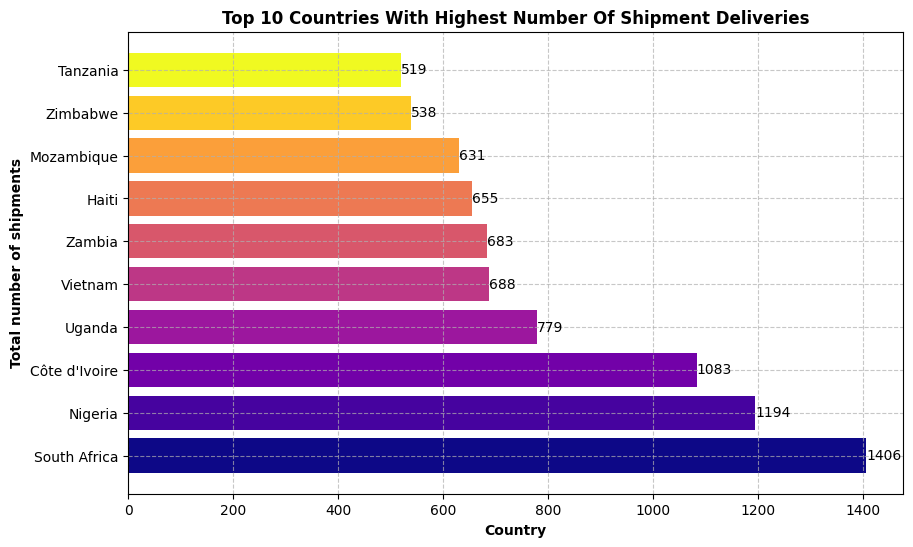

In [ ]:

top_n = 10 # how many top countries to plot for
df_country_top = df_country.head(top_n)

plt.figure(figsize=(10,6)) # creating a figure object using pyplot
# horizontal bar plot using .barh and specifing the dataset columns
plt.barh(df_country_top.index, df_country_top, color=plt.cm.plasma(np.linspace(0,1,top_n)))
title = "Top 10 countries with highest number of shipment deliveries".title()
plt.title(title, fontweight = "bold") # plot title
plt.xlabel("Country", fontweight = "bold") # label for x-axis
plt.ylabel("Total number of shipments", fontweight = "bold") # label for y-axis
plt.grid(axis='x', linestyle="--", alpha=0.7) # grid for x axis with style -- and alpha is transparency
plt.grid(axis='y', linestyle="--", alpha=0.7) # grid for y axis

for index, value in enumerate(df_country_top):
    # adding text i.e frequency at the end of bar
    plt.text(value, index, str(value), ha='left', va='center')

##### **Remarks**
- From the above plot we can see that South Africa, Nigeria, Côte d'Ivoire, Uganda and Vietnam  occupy the top 5 spot.
- We can see that the dataset has more shipments to **African Countries** a cause of that would be lack of pharmaceutical products in African Continent

#### **Countries with low number of Shipment Deliveries**

In [ ]:
# creating a pandas series with frequency of country in dataset
df_country = df_clean["Country"].value_counts().sort_values(ascending=True)
df_country.head()

,count
Country,
Belize,1
Guinea,1
Kazakhstan,2
Kyrgyzstan,2
Burkina Faso,2


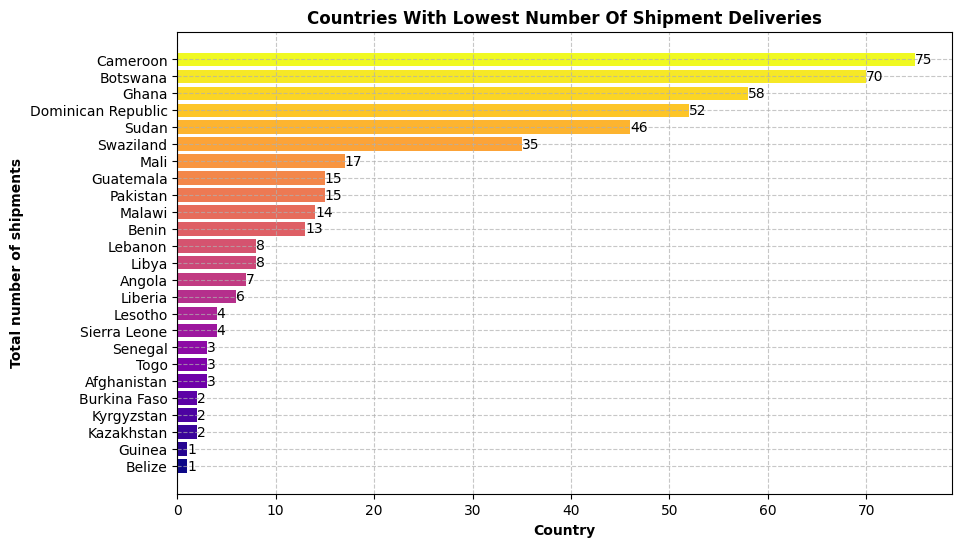

In [ ]:

top_n = 25 # how many  countries to plot for
df_country_top = df_country.head(top_n)

plt.figure(figsize=(10,6)) # creating a figure object using pyplot
# horizontal bar plot using .barh and specifing the dataset columns
plt.barh(df_country_top.index, df_country_top, color=plt.cm.plasma(np.linspace(0,1,top_n)))
title = "Countries with Lowest number of shipment deliveries".title()
plt.title(title, fontweight = "bold") # plot title
plt.xlabel("Country", fontweight = "bold") # label for x-axis
plt.ylabel("Total number of shipments", fontweight = "bold") # label for y-axis
plt.grid(axis='x', linestyle="--", alpha=0.7) # grid for x axis with style -- and alpha is transparency
plt.grid(axis='y', linestyle="--", alpha=0.7) # grid for y axis

for index, value in enumerate(df_country_top):
    # adding text i.e frequency at the end of bar
    plt.text(value, index, str(value), ha='left', va='center')

##### **Remarks**
- We can see that countries below Swaziland have very less number of shipments.
- The cause of which may be indigenous pharmaceutical drugs or through border countries like Belize is bordered with Mexico which has good availability of pharma drugs.

#### **Overall Frequency Distribution of Categorical Variables**

In [ ]:
df_clean.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [ ]:
# lists of all categorical datatypes to plot
custom_categorcal_data = ['Vendor', 'Brand', 'Manufacturing Site', 'First Line Designation']

categorical_data = ['Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
                    'Product Group', 'Sub Classification', 'Dosage Form',
                    'First Line Designation' ]

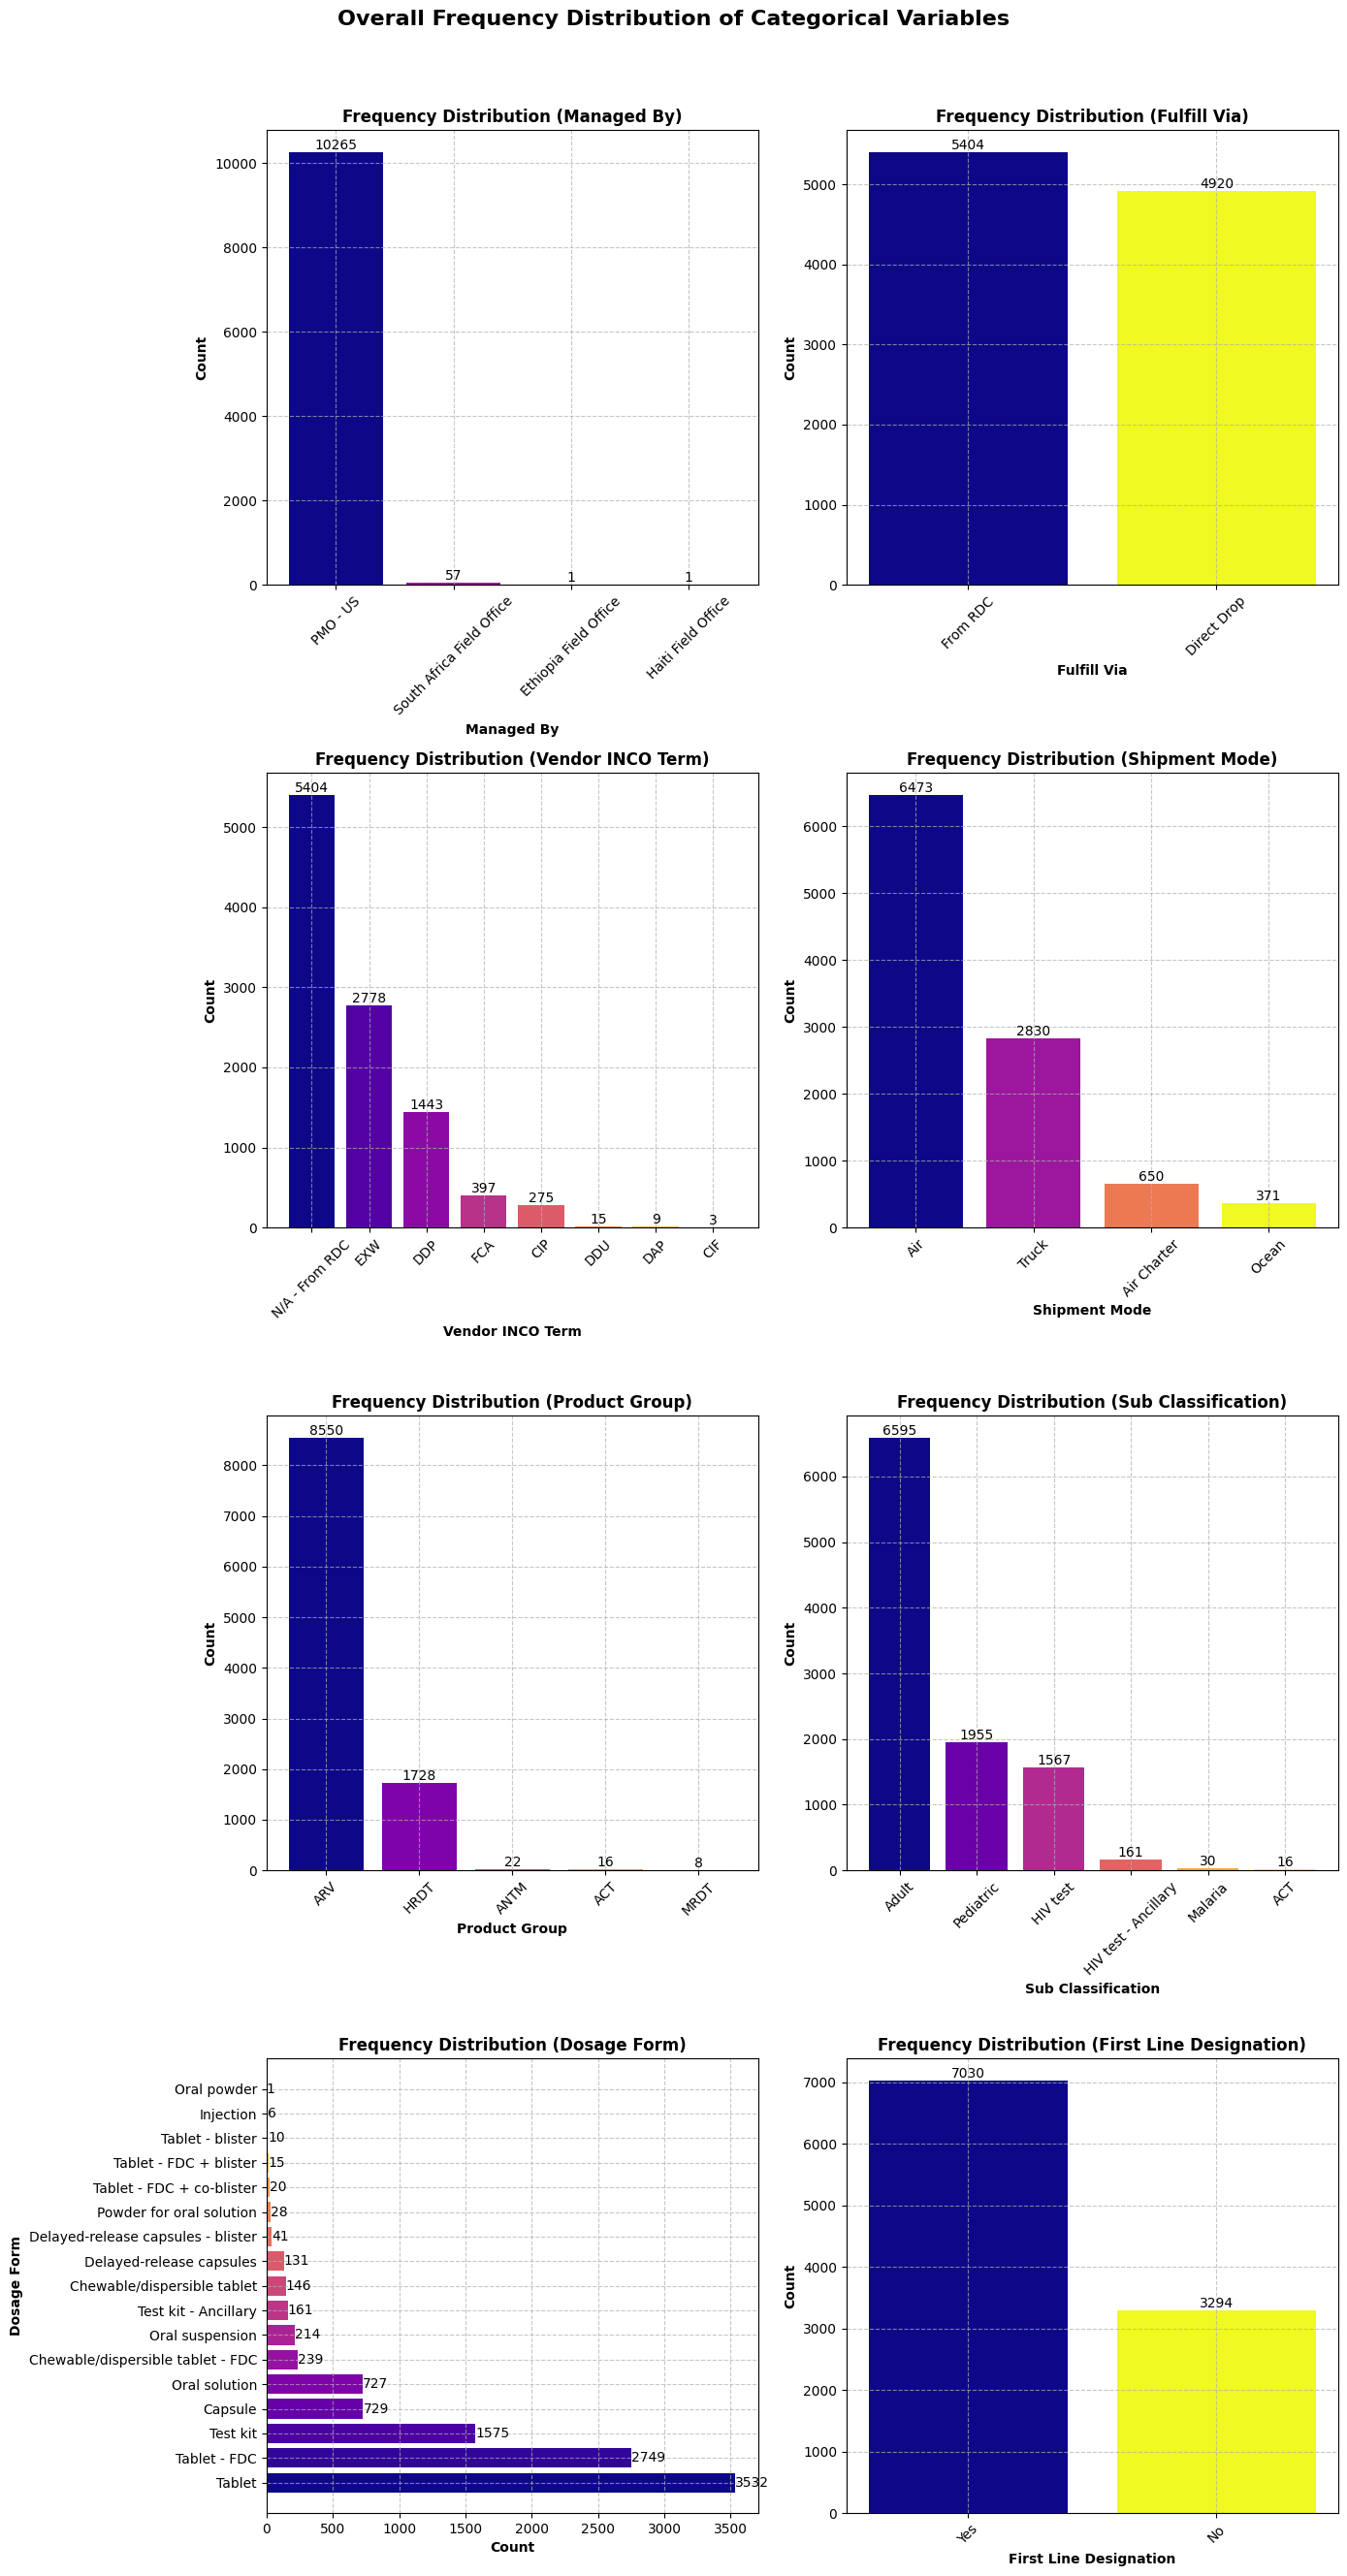

In [ ]:
import matplotlib.pyplot as plt

# categorical data columns  to plot
categorical_data = ['Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
                    'Product Group', 'Sub Classification', 'Dosage Form',
                    'First Line Designation' ]

# Creating fig and axes objects and mentioning the subplots
fig, axes = plt.subplots(4, 2, figsize=(14, 26))

# Flatten the axes array to make 1D indexing consistent
axes = axes.flatten()

# Loop through each categorical column and plot
for i, col in enumerate(categorical_data):
    df_value_counts = df_clean[col].value_counts()

    # Determine if  length exceeds a certain threshold
    if len(df_value_counts) > 8:
        # Use horizontal bar chart for better visibility
        # using axes[i] to use a particular subplot each iteration
        axes[i].barh(df_value_counts.index, df_value_counts, color=plt.cm.plasma(np.linspace(0, 1,len(df_value_counts))))
        axes[i].set_title(f"Frequency Distribution ({col})", fontweight="bold")
        axes[i].set_ylabel(col, fontweight = 'bold')
        axes[i].set_xlabel("Count", fontweight='bold')
        axes[i].grid(axis="x", linestyle='--', alpha=0.7) # applying grid
        axes[i].grid(axis="y", linestyle='--', alpha=0.7)

        # Add text labels on the bars
        for index, value in enumerate(df_value_counts):
            axes[i].text(value, index, str(value), ha='left', va='center')
    else:
        # Use vertical bar chart
        axes[i].bar(df_value_counts.index, df_value_counts, color=plt.cm.plasma(np.linspace(0, 1,len(df_value_counts))))
        axes[i].set_title(f"Frequency Distribution ({col})", fontweight="bold")
        axes[i].set_xlabel(col, fontweight="bold")
        axes[i].set_ylabel("Count", fontweight="bold")
        axes[i].tick_params(axis="x", rotation=45)
        axes[i].grid(axis="x", linestyle='--', alpha=0.7)
        axes[i].grid(axis="y", linestyle='--', alpha=0.7)

        # Add text labels on the bars
        for index, value in enumerate(df_value_counts):
            axes[i].text(index, value, str(value), ha='center', va='bottom')

# Show the plot
fig.suptitle("Overall Frequency Distribution of Categorical Variables", fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


In [ ]:
custom_categorical_data = ['Vendor', 'Brand', 'Manufacturing Site', 'First Line Designation']


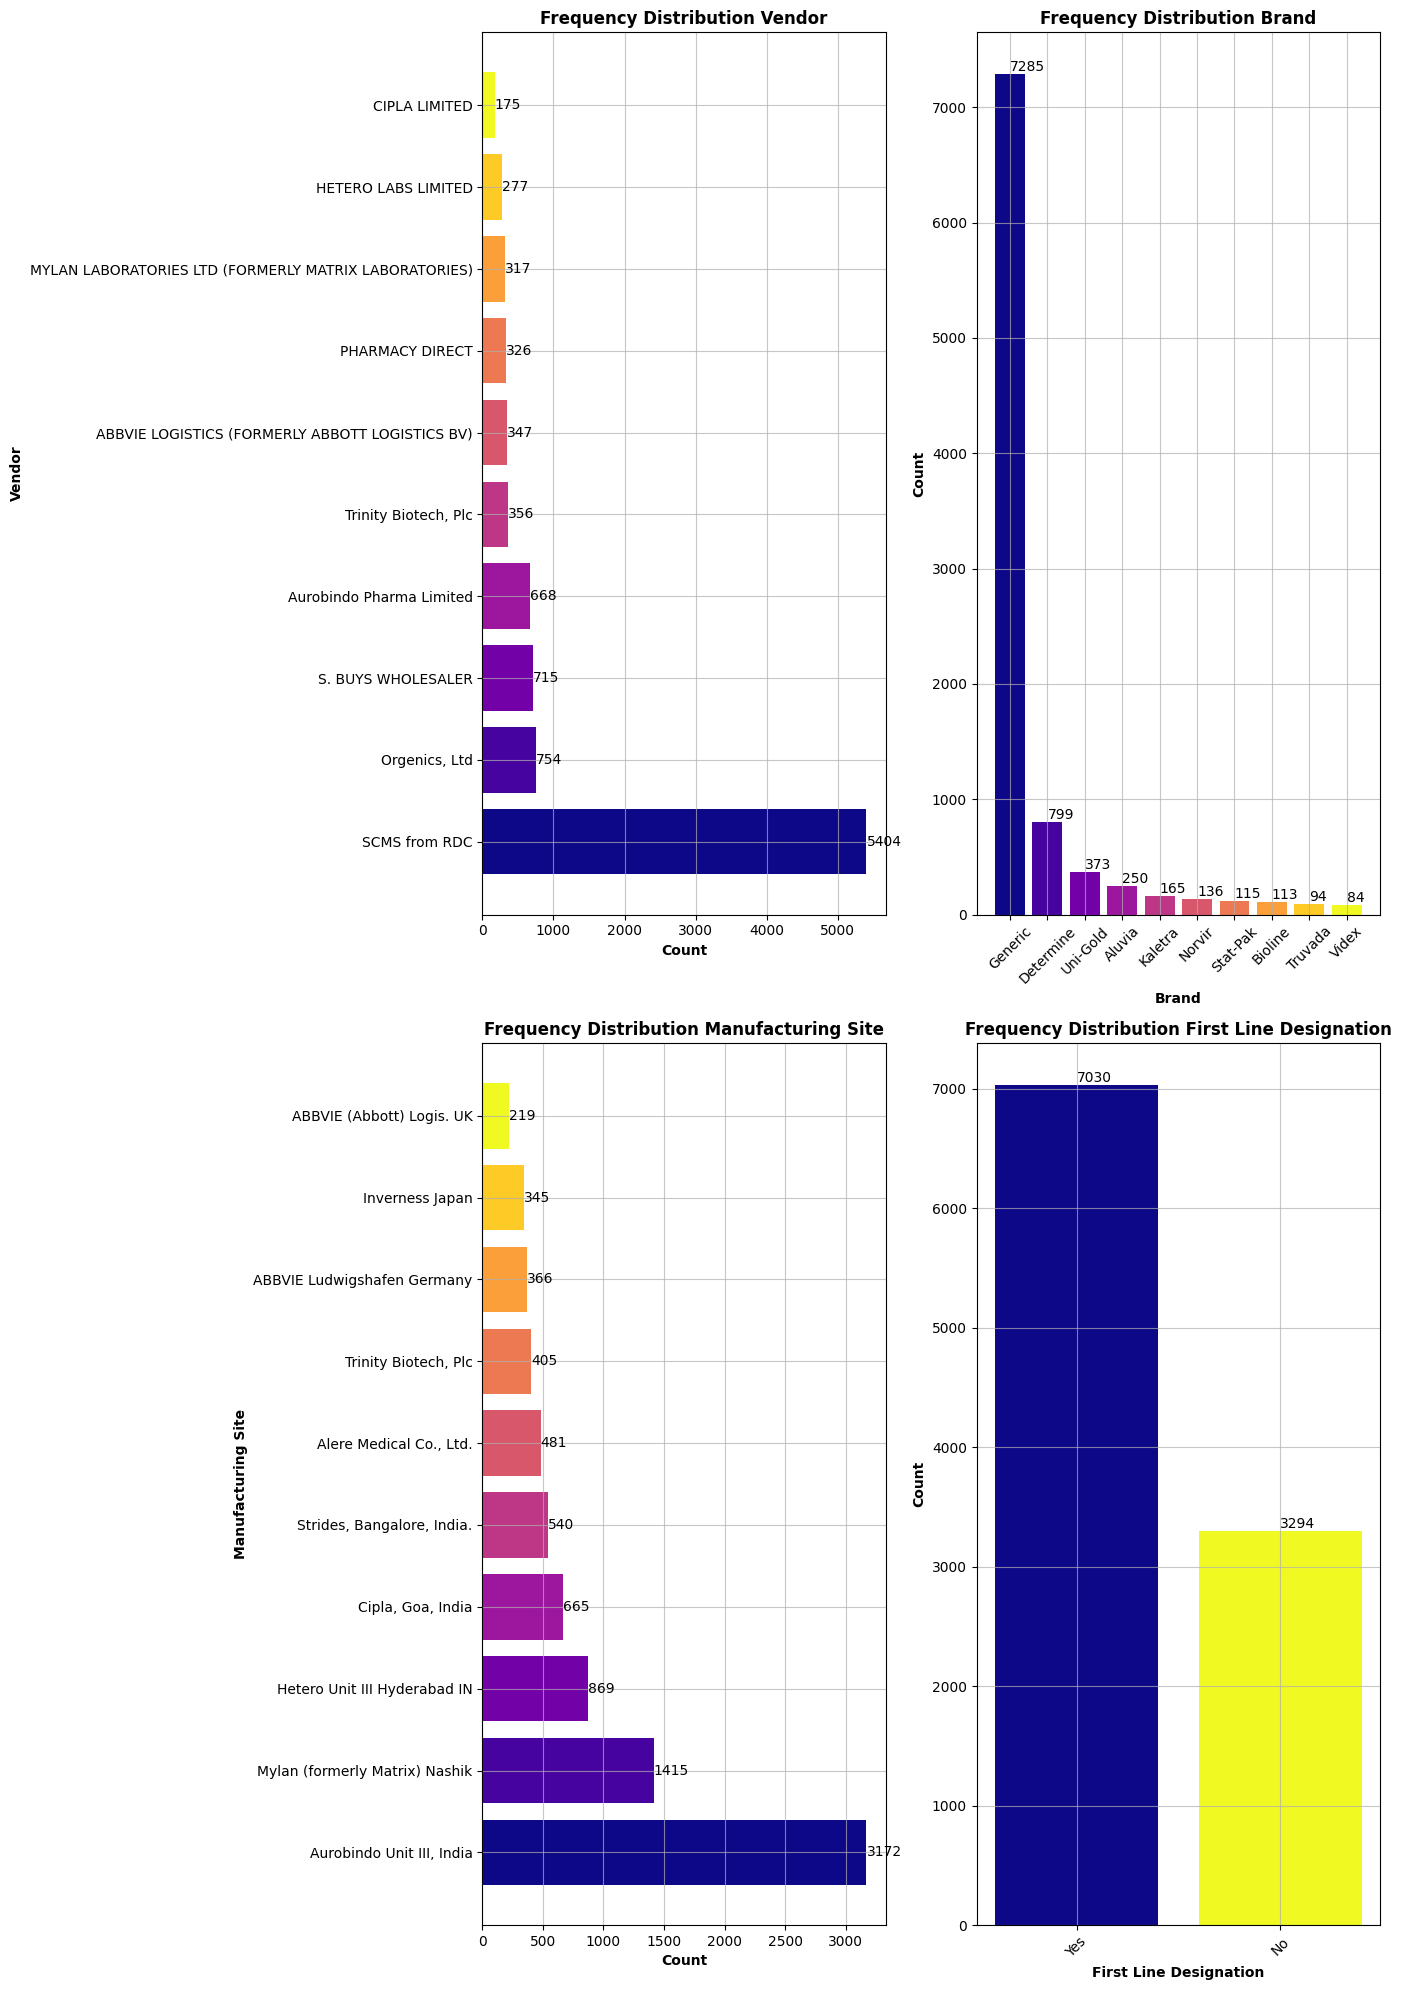

In [ ]:
import matplotlib.pyplot as plt

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 20))
axes = axes.flatten()

for i, col in enumerate(custom_categorical_data):
    top_n = 10
    df_value_counts = df_clean[col].value_counts().head(top_n)

    if i == 0 or i == 2:  # Horizontal bar charts for i = 0 and 2
        axes[i].barh(df_value_counts.index, df_value_counts, color=plt.cm.plasma(np.linspace(0, 1,len(df_value_counts))))
        axes[i].set_title(f'Frequency Distribution {col}', fontweight="bold")
        axes[i].set_xlabel('Count', fontweight="bold")  # Updated for horizontal bars
        axes[i].set_ylabel(f'{col}', fontweight="bold")
        axes[i].grid(axis="x", alpha=0.7)
        axes[i].grid(axis="y", alpha=0.7)
        axes[i].tick_params(axis="x")
        # Adding text labels to the bars
        for index, value in enumerate(df_value_counts):
            axes[i].text(value, index, str(value), va="center")  # Adjusted for horizontal bars
    else:  # Vertical bar charts for i = 1 and 3
        axes[i].bar(df_value_counts.index, df_value_counts, color=plt.cm.plasma(np.linspace(0, 1,len(df_value_counts))))
        axes[i].set_title(f'Frequency Distribution {col}', fontweight="bold")
        axes[i].set_xlabel(f'{col}', fontweight="bold")
        axes[i].set_ylabel('Count', fontweight="bold")
        axes[i].grid(axis="x", alpha=0.7)
        axes[i].grid(axis="y", alpha=0.7)
        axes[i].tick_params(axis="x", rotation=45)

        # Adding text labels to the bars
        for index, value in enumerate(df_value_counts):
            axes[i].text(index, value, str(value), va="bottom")

plt.tight_layout()
plt.show()


##### **Remarks**
 1. **INCO Terms**
    - N/A - From RDC is most common inco term for shipments followed by EXW and DDP
     > 1. N/A - From RDC is common because it supports fast, regional distribution
     > 2. EXW suits buyers who have their logistics in place and can handle transportation and customs costs.
     > 3. DDP is ideal for buyers wanting a worry-free, all-inclusive delivery process.

2. **Shipment Mode**
   - Air and Truck are most used mode of transport in this dataset.

3. **Product Group**
   - ARV and HRDT are most shipped product groups.
   - ARV refers to medications used in antiretroviral therapy, which is a treatment for HIV/AIDS.
   - HRDT products are likely designated for the treatment of high-risk or severe infectious diseases. ex - TB, malaria

4. **Subclassification**
  - Adult , Pediatric and Aids test are most common subclassifications.

5. **Dosage Form**
 - Tablet is the most common dosage form.
 - followed by Table-FDC , Test-kit, capsules and oral solution as top 5 and most used forms.
 - Rest forms are significantly low

6. **First line designation**
 - First line designation is Yes in 7030 shipments which is around 70 percent of total.
 - rest around 30 percent is No.

7. **Vendor**
 - SCMS from RDC (Supply Chain Management System (SCMS) from regional distribution) has the most number of shipments i.e is around 52 percent.
 - followed by Orgenics, S. BUYS and Aurobindo pharma limited with similar number of orders around 7-8 percent of total shipments each.
 - Abbvie logistics , Pharmacy direct, Mylan laboratories, Hetro labs contribute to around 3-4 percent each.


  

<a name='dist'></a>

### Distribution of numerical data

##### **Frequency Distribution of Numerical data using Histogram**

In [ ]:
# numerical columns list
df_numerical = ['Unit of Measure (Per Pack)', 'Line Item Quantity','Line Item Value', 'Pack Price', 'Unit Price','Weight (Kilograms)', 'Freight Cost (USD)','Line Item Insurance (USD)']

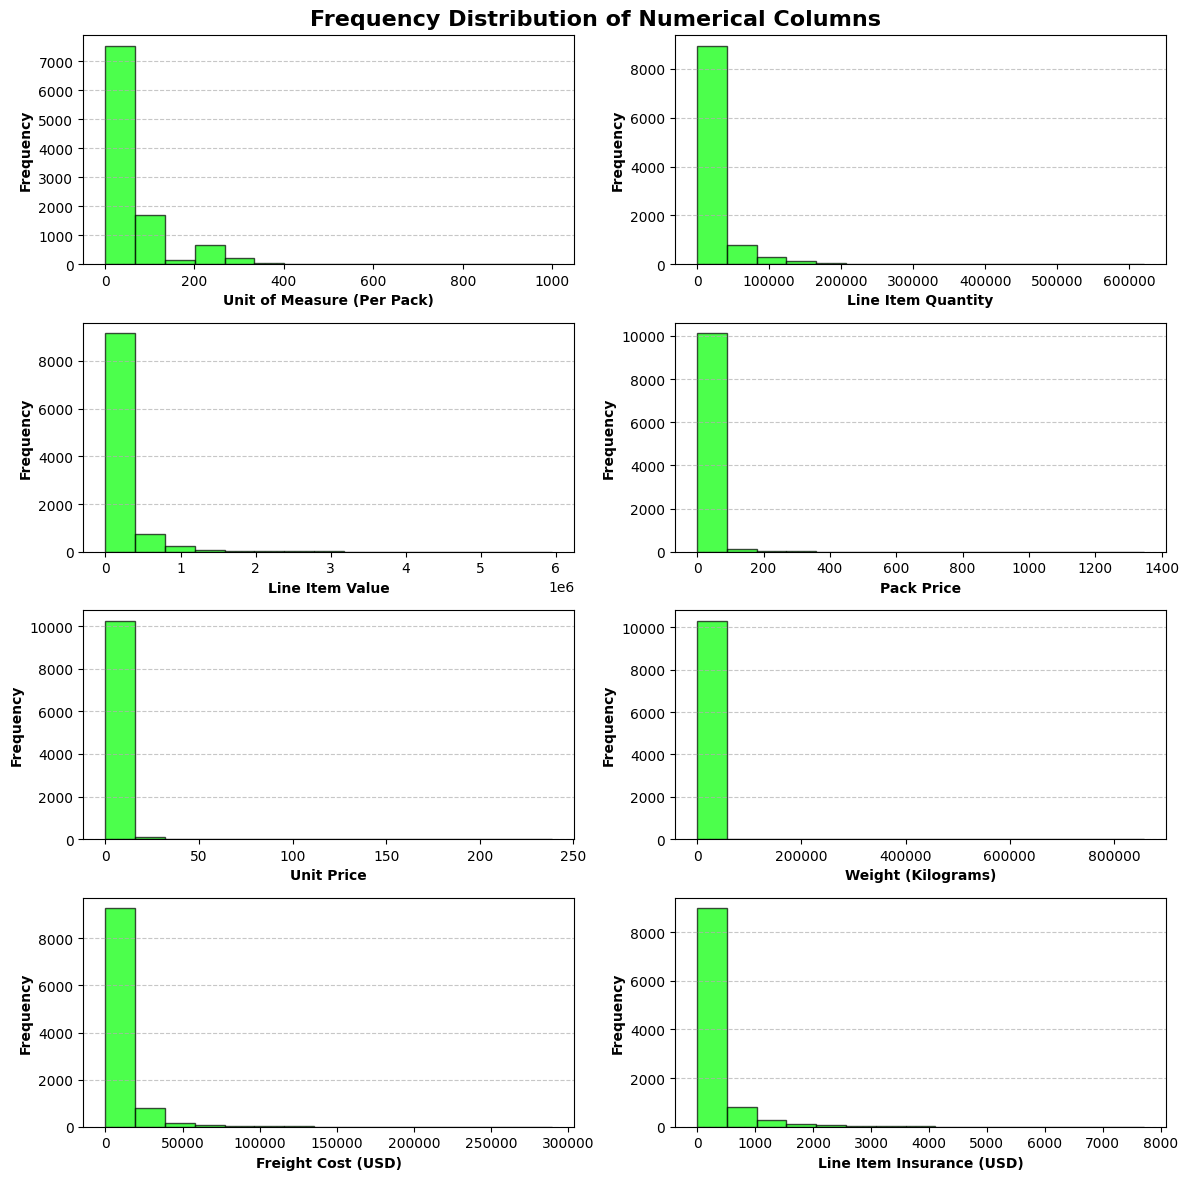

In [ ]:
# creating subplots
fig,ax = plt.subplots(4,2, figsize = (12,12))
ax = ax.flatten()
# iterating through each column and plotting on each subplot axes

for i, col in enumerate(df_numerical):
    # plotting histogram with bin size 15 , edgecolor for outline color of each bar
    ax[i].hist(df_clean[col], bins=15, color="lime", edgecolor='black', alpha=0.7)
    ax[i].set_xlabel(col, fontweight ="bold")
    ax[i].set_ylabel("Frequency", fontweight ="bold")
    # data_min = df_clean[col].min()
    # data_max = df_clean[col].max()
    ax[i].grid(axis="y", linestyle="--", alpha=0.7)
# adding a supertitle
fig.suptitle("Frequency Distribution of Numerical Columns", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()



###### **Remarks**
- It is apparent from the histograms that data is concentrated to the left i.e skewed towards to right.
- This is due to some outliers in the data.

##### **Frequency Distribution of Numerical data using Boxplot**

In [ ]:
df_numerical = ['Unit of Measure (Per Pack)', 'Line Item Quantity','Line Item Value', 'Pack Price', 'Unit Price','Weight (Kilograms)', 'Freight Cost (USD)','Line Item Insurance (USD)']

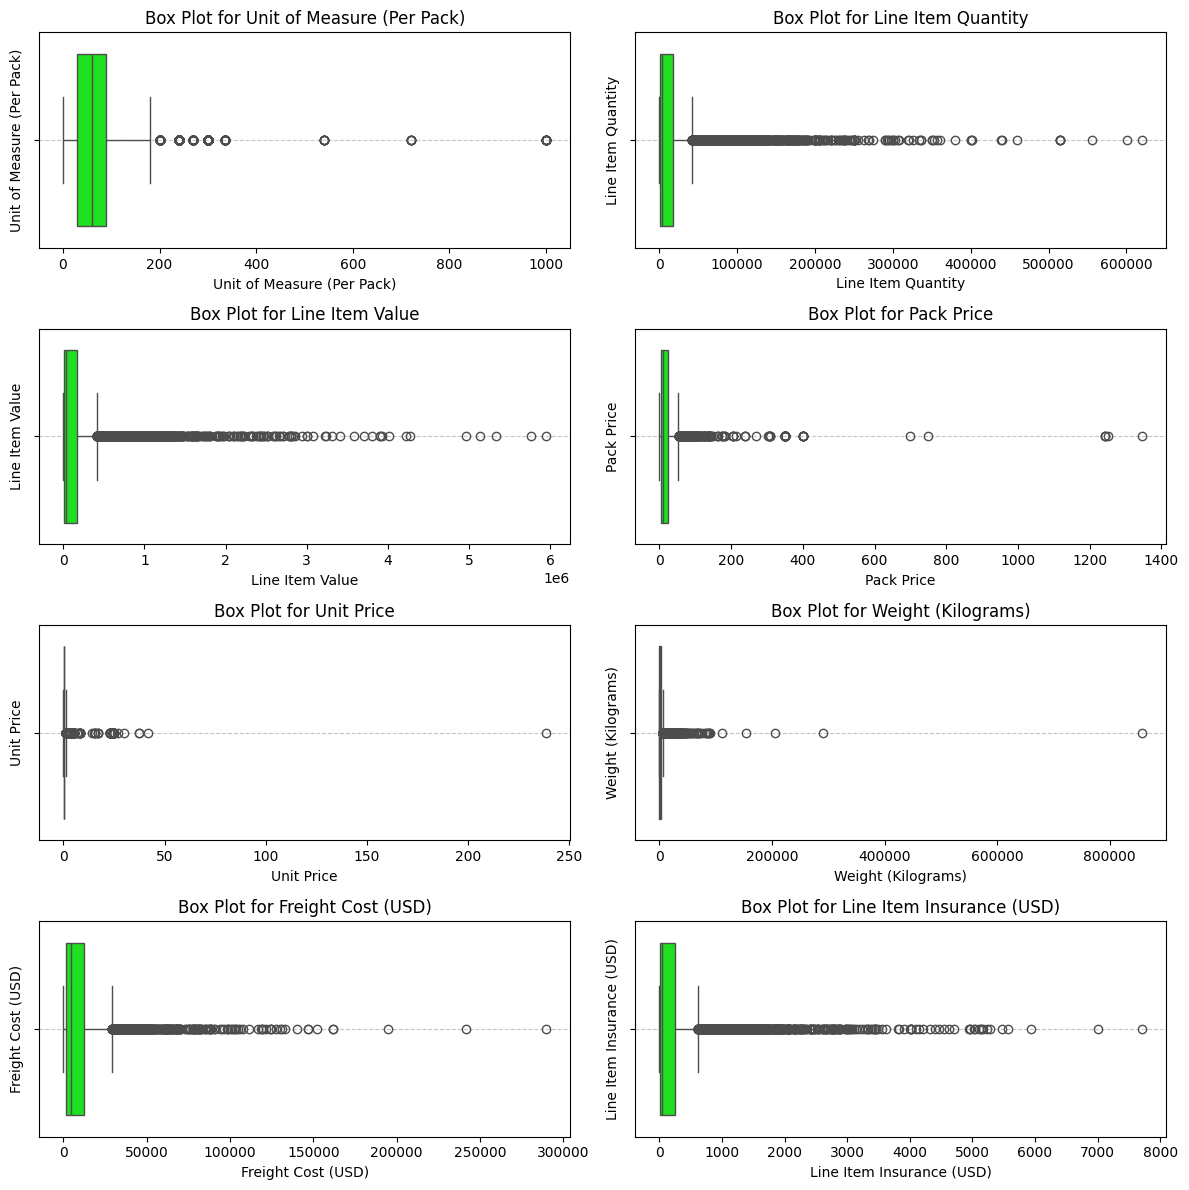

In [ ]:
# Creating subplots
fig, axes = plt.subplots(4, 2, figsize=(12, 12))

# Flatten axes for easy 1D indexing, if there are multiple rows
axes = axes.flatten()

# Create box plots for each column in df_numerical
for i, col in enumerate(df_numerical):
    sns.boxplot(x=df_clean[col], color="lime", ax=axes[i])
    axes[i].set_title(f"Box Plot for {col}")
    axes[i].set_ylabel(col)
    axes[i].grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

###### **Remarks**
- Unit of measure has the least amount of outliers.
- Most of datapoints in the plots are concentrated towards lower values.
- There are some outliers in all numerical data.

##### **Frequency Distribution of Numerical data using KDE plot**

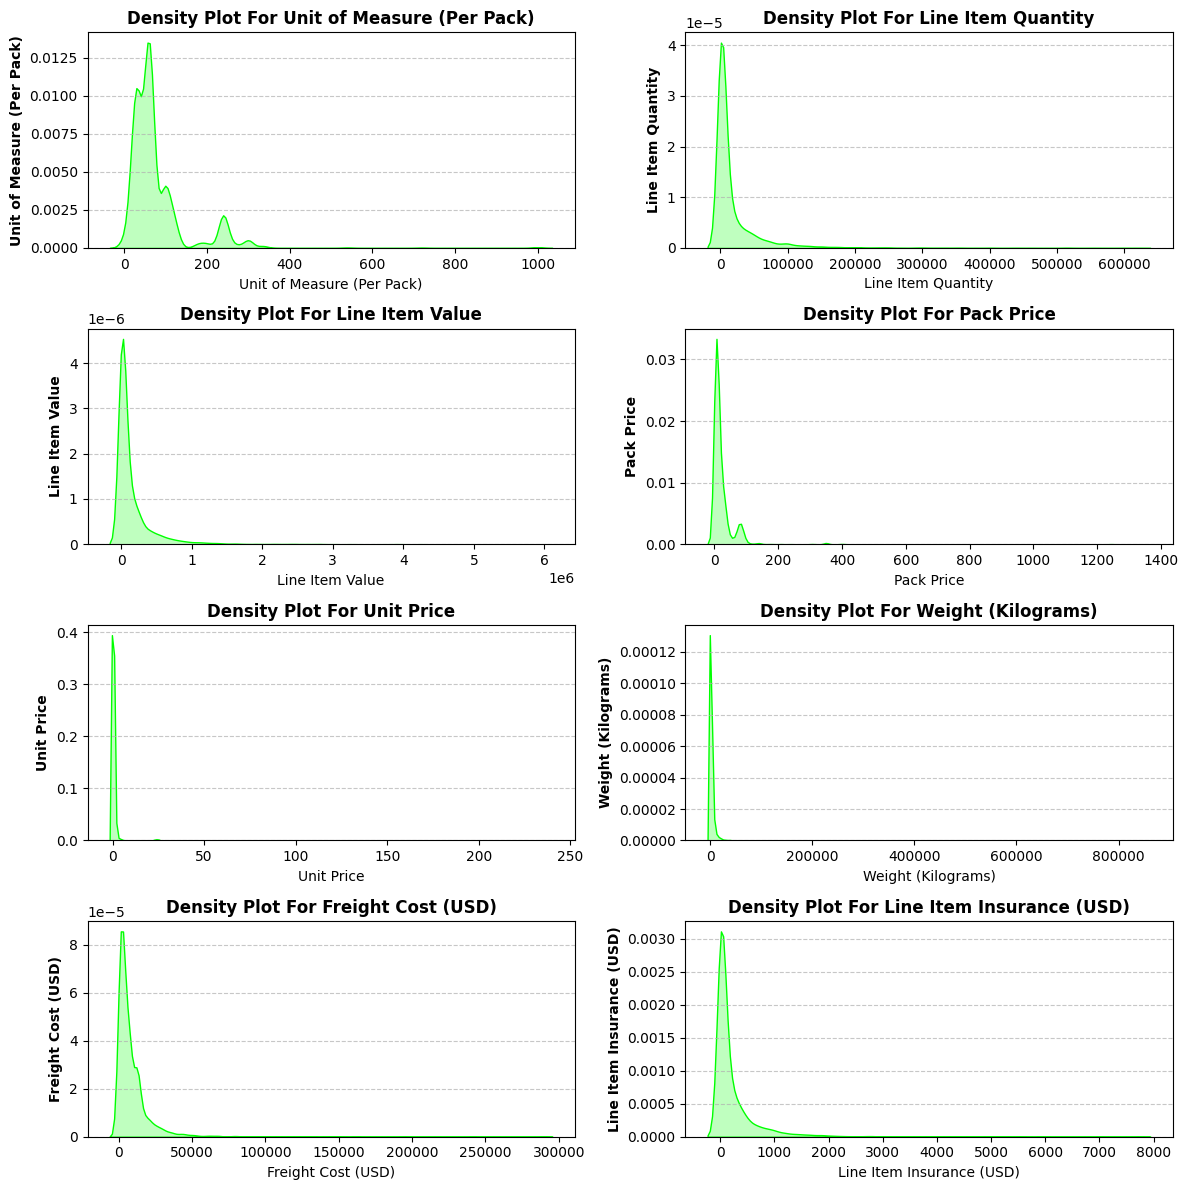

In [ ]:
# creating subplots
fig, axes = plt.subplots(4, 2, figsize=(12, 12))

# Flatten axes for easy 1D indexing, if there are multiple rows
axes = axes.flatten()

# Create box plots for each column in df_numerical
for i, col in enumerate(df_numerical):
    sns.kdeplot(data=df_clean[col], ax=axes[i], fill=True, color="lime") # using seaborn
    axes[i].set_title(f"Density Plot For {col}", fontweight = "bold")
    axes[i].set_ylabel(col, fontweight = "bold")
    axes[i].grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

###### **Remarks**
- kde plot confirms the findings of histograms and box plots that
   > Most of the datapoints are concentrated towards lower values.
   > some outleirs stretch across to higher values in the dataset.
   > These outliers cause skewness in the dataset.

## Outlier Detection

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            10324 non-null  int32         
 1   Project Code                  10324 non-null  category      
 2   PQ #                          10324 non-null  category      
 3   PO / SO #                     10324 non-null  category      
 4   ASN/DN #                      10324 non-null  category      
 5   Country                       10324 non-null  category      
 6   Managed By                    10324 non-null  category      
 7   Fulfill Via                   10324 non-null  category      
 8   Vendor INCO Term              10324 non-null  category      
 9   Shipment Mode                 10324 non-null  category      
 10  PQ First Sent to Client Date  7643 non-null   datetime64[ns]
 11  PO Sent to Vendor Date      

In [ ]:
# checking skewness in dataset
skew(df_clean['Unit of Measure (Per Pack)'])

4.3018773400825125

In [ ]:
df_clean['Unit of Measure (Per Pack)'].describe()

,Unit of Measure (Per Pack)
count,10324.000000
mean,77.990895
std,76.579764
min,1.000000
25%,30.000000
50%,60.000000
75%,90.000000
max,1000.000000


In [ ]:
# checking the quantile ranges
q1 = df_clean['Unit of Measure (Per Pack)'].quantile(0.25)
q3 = df_clean['Unit of Measure (Per Pack)'].quantile(0.75)
print("25%",q1)
print("75%",q3)

25% 30.0
75% 90.0


In [ ]:
# calculating interquartile range
iqr = q3-q1

lower_unit_measure = q1 - 1.5*iqr
# it comes out to be -ve which does not make sense for our dataset so dropping it
# finding upper limit
upper_unit_measure = q3+1.5*iqr
print(upper_unit_measure)

180.0


In [ ]:
# checking the dataset above the upperlimit
df_clean[df_clean['Unit of Measure (Per Pack)']>upper_unit_measure].sample(20)

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
4820,51275,108-VN-T30,FPQ-11418,SCMS-176180,ASN-19098,Vietnam,PMO - US,Direct Drop,EXW,Air,2013-01-29,2013-02-05,2013-05-22,2013-05-22,2013-05-22,ARV,Pediatric,Aurobindo Pharma Limited,"Zidovudine 10mg/ml, oral solution w/syringe, B...",Zidovudine,Generic,10mg/ml,Oral solution,240,471,989.099976,2.100000,0.01,"Aurobindo Unit III, India",No,285.0,3478.000000,1.220000
6075,73176,116-ZA-T30,FPQ-13035,SCMS-215370,ASN-24415,South Africa,PMO - US,Direct Drop,DDP,Truck,2013-10-08,2013-12-02,2014-02-06,2014-02-06,2014-02-06,ARV,Pediatric,S. BUYS WHOLESALER,"Abacavir 20mg/ml, oral solution w/syringe, Bot...",Abacavir,Generic,20mg/ml,Oral solution,240,258,5919.279785,22.940001,0.10,"Aurobindo Unit III, India",No,42.0,1193.150024,7.320000
1219,10814,111-MZ-T01,Pre-PQ Process,SO-497,DN-121,Mozambique,PMO - US,From RDC,N/A - From RDC,Air,NaT,NaT,2007-05-18,2007-05-18,2007-05-18,ARV,Pediatric,SCMS from RDC,"Abacavir 20mg/ml, oral solution, Bottle, 240 ml",Abacavir,Generic,20mg/ml,Oral solution,240,474,10191.000000,21.500000,0.09,"Aurobindo Unit III, India",Yes,221.0,710.679993,20.450001
1910,11824,117-ET-T01,Pre-PQ Process,SO-1009,DN-495,Ethiopia,PMO - US,From RDC,N/A - From RDC,Air,NaT,NaT,2007-12-20,2007-12-20,2007-12-20,ARV,Pediatric,SCMS from RDC,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,11168,69241.601562,6.200000,0.03,"Aurobindo Unit III, India",Yes,4583.0,14554.500000,110.790001
9031,85219,105-GY-T30,FPQ-8024,SO-40451,DN-2474,Guyana,PMO - US,From RDC,N/A - From RDC,Air,2011-08-19,NaT,2012-01-31,2012-01-18,2012-01-18,ARV,Pediatric,SCMS from RDC,"Lamivudine 10mg/ml, oral solution w/syringe, B...",Lamivudine,Generic,10mg/ml,Oral solution,240,284,525.400024,1.850000,0.01,"Aurobindo Unit III, India",Yes,103.0,1783.380005,0.870000
8301,84342,104-CI-T30,FPQ-12800,SO-46361,DN-3567,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Air,2013-08-09,NaT,2014-03-28,2014-03-26,2014-04-28,ARV,Pediatric,SCMS from RDC,"Zidovudine 10mg/ml, oral solution w/syringe, B...",Zidovudine,Generic,10mg/ml,Oral solution,240,2867,6020.700195,2.100000,0.01,"Aurobindo Unit III, India",Yes,5752.0,18607.759766,7.450000
4930,53254,116-ZA-T30,FPQ-12522,SCMS-199289,ASN-28033,South Africa,PMO - US,Direct Drop,DDP,Truck,2013-07-11,2014-08-29,2014-08-29,2014-08-29,2014-08-29,ARV,Pediatric,S. BUYS WHOLESALER,"Abacavir 20mg/ml, oral solution w/syringe, Bot...",Abacavir,Generic,20mg/ml,Oral solution,240,135,3650.159912,27.040001,0.11,"Aurobindo Unit III, India",No,42.0,1193.150024,4.520000
9513,85809,110-ZM-T30,FPQ-7667,SO-40242,DN-2457,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,2011-07-26,NaT,2012-01-10,2012-01-20,2012-01-20,ARV,Pediatric,SCMS from RDC,"Nevirapine 10mg/ml, oral suspension w/syringe,...",Nevirapine,Generic,10mg/ml,Oral suspension,240,8000,15600.000000,1.950000,0.01,"Aurobindo Unit III, India",Yes,3088.0,6476.689941,25.740000
7588,83489,105-GY-T30,FPQ-7128,SO-38840,DN-2129,Guyana,PMO - US,From RDC,N/A - From RDC,Air,2011-02-04,NaT,2011-03-31,2011-03-25,2011-03-25,ARV,Pediatric,SCMS from RDC,"Abacavir 20mg/ml, oral solution w/syringe, Bot...",Abacavir,Generic,20mg/ml,Oral solution,240,99,1356.300049,13.700000,0.06,"Aurobindo Unit III, India",No,42.0,1193.150024,2.240000
4968,54045,108-VN-T30,FPQ-5094,SCMS-68700,ASN-7337,Vietnam,PMO - US,Direct Drop,FCA,Air,2010-03-15,2010-03-31,2010-08-02,2010-08-02,2010-08-02,ARV,Adult,ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV),"Ritonavir 100mg [Norvir], cap

In [ ]:
# checking quantile ranges for weight
q1 = df_clean['Weight (Kilograms)'].quantile(0.25)
q3 = df_clean['Weight (Kilograms)'].quantile(0.75)
print("25%",q1)
print("75%",q3)

25% 99.0
75% 2670.5


In [ ]:
# calculating iqr
iqr = q3-q1
# lower limit of dataset
lower_unit_measure = q1 - 1.5*iqr
# it comes out to be -ve which does not make sense for our dataset
# upper limit of dataset
upper_unit_measure = q3+1.5*iqr
print(upper_unit_measure)

6527.75


In [ ]:
# displaying outliers
df_clean[df_clean['Weight (Kilograms)']>upper_unit_measure].sample(20)

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
536,5293,102-GY-T01,Pre-PQ Process,SCMS-225,ASN-113,Guyana,PMO - US,Direct Drop,EXW,Air,NaT,NaT,2006-11-15,2006-11-15,2006-11-15,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,300mg,Test kit,100,230,1.840000e+04,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,38681.0,801.539978,1.580000
6815,82519,900-CM-T30,FPQ-10641,SO-43390,DN-2886,Cameroon,PMO - US,From RDC,N/A - From RDC,Air Charter,2012-09-19,NaT,2012-10-24,2012-10-17,2012-10-17,ARV,Adult,SCMS from RDC,Lamivudine/Nevirapine/Zidovudine 150/200/300mg...,Lamivudine/Nevirapine/Zidovudine,Generic,150/300/200mg,Tablet - FDC,60,152000,1.462240e+06,9.62,0.16,Mylan (formerly Matrix) Nashik,Yes,43571.0,67732.539062,2050.060059
5657,66030,161-ZA-T30,FPQ-5648,SCMS-75480,ASN-8649,South Africa,PMO - US,Direct Drop,DDP,Air,2010-06-02,2010-06-17,2010-12-13,2010-12-08,2010-12-08,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension w/syringe,...",Nevirapine,Generic,10mg/ml,Oral suspension,240,19060,6.003900e+04,3.15,0.01,"Aurobindo Unit III, India",Yes,7353.0,4876.339844,129.440002
5850,69376,161-ZA-T30,FPQ-6262,SCMS-83820,ASN-9485,South Africa,PMO - US,Direct Drop,DDP,Ocean,2010-08-31,2010-09-24,2011-03-10,2011-03-10,2011-03-10,ARV,Adult,Aurobindo Pharma Limited,"Efavirenz 600mg, tablets, 30 Tabs",Efavirenz,Generic,600mg,Tablet,30,127904,5.794051e+05,4.53,0.15,"Aurobindo Unit III, India",Yes,10980.0,15331.500000,1249.199951
9619,85920,111-MZ-T30,FPQ-10211,SO-42870,DN-2966,Mozambique,PMO - US,From RDC,N/A - From RDC,Truck,2012-06-28,NaT,2013-01-31,2013-01-11,2013-01-11,ARV,Adult,SCMS from RDC,Lamivudine/Nevirapine/Zidovudine 150/200/300mg...,Lamivudine/Nevirapine/Zidovudine,Generic,150/300/200mg,Tablet - FDC,60,67271,6.471470e+05,9.62,0.16,"Aurobindo Unit III, India",Yes,7899.0,7433.009766,907.299988
8640,84747,104-CI-T30,FPQ-9063,SO-41360,DN-2816,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,2011-12-21,NaT,2012-10-02,2012-08-27,2012-08-27,ARV,Adult,SCMS from RDC,Lamivudine/Nevirapine/Zidovudine 150/200/300mg...,Lamivudine/Nevirapine/Zidovudine,Generic,150/300/200mg,Tablet - FDC,60,75000,7.357500e+05,9.81,0.16,Mylan (formerly Matrix) Nashik,Yes,14413.0,11874.849609,1031.520020
9248,85474,109-TZ-T30,FPQ-12354,SO-45743,DN-3688,Tanzania,PMO - US,From RDC,N/A - From RDC,Truck,2013-05-16,NaT,2014-06-01,2014-06-05,2014-06-12,ARV,Adult,SCMS from RDC,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Generic,600/300/300mg,Tablet - FDC,30,151208,1.590708e+06,10.52,0.35,Hetero Unit III Hyderabad IN,Yes,20501.0,13765.169922,1967.709961
5490,63438,109-TZ-T30,FPQ-12540,SCMS-198771,ASN-22834,Tanzania,PMO - US,Direct Drop,EXW,Air,2013-07-03,2013-08-27,2013-12-27,2013-12-27,2013-12-27,ARV,Adult,CIPLA LIMITED,Lamivudine/Nevirapine/Zidovudine 150/200/300mg...,Lamivudine/Nevirapine/Zidovudine,Generic,150/300/200mg,Tablet - FDC,60,80516,6.521796e+05,8.10,0.13,"Cipla, Goa, India",Yes,11646.0,50445.730469,806.750000
2267,12315,110-ZM-T01,Pre-PQ Process,SO-29090,DN-1406,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,NaT,NaT,2009-09-22,2009-09-22,2009-09-22,ARV,Adult,SCMS from RDC,Lamivudine/Tenofovir Disoproxil Fumarate 300/3...,Lamivudine/Tenofovir Disoproxil Fumarate,Generic,300/300mg,Tablet - FDC,30,92095,1.059092e+06,11.50,0.38,Mylan (formerly Matrix) Nashik,Yes,7686.0,6759.279785,2075.820068
3128,21230,109-TZ-T30,FPQ-12286,SCMS-193860,ASN-21

###### **Remarks**

<p align = "justify">From above outlier samples we can see that in case of 'Unit of Measure (Per Pack)' when unit of measure has a upper limit outlier i.e large value the value of other factors like value, freight cost, weight also increases.</p>

- This means that they not a wrong or mistake born outliers , they are valid datapoints.
<br>
- Same goes for weight and other numerical variables.
<br>
-  When one column has a large value other show same behavier as well.
- Removal is not necessary as it will deprive us of trends with higher values for-eg Does insurance cost increase with higher weight

## **Bivariate analysis**
- Analysing data with two variables

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            10324 non-null  int32         
 1   Project Code                  10324 non-null  category      
 2   PQ #                          10324 non-null  category      
 3   PO / SO #                     10324 non-null  category      
 4   ASN/DN #                      10324 non-null  category      
 5   Country                       10324 non-null  category      
 6   Managed By                    10324 non-null  category      
 7   Fulfill Via                   10324 non-null  category      
 8   Vendor INCO Term              10324 non-null  category      
 9   Shipment Mode                 10324 non-null  category      
 10  PQ First Sent to Client Date  7643 non-null   datetime64[ns]
 11  PO Sent to Vendor Date      

##### **Countries With Most Delayed Deliveries**

In [ ]:
import numpy as np

# Define conditions
conditions = [
    df_clean['Scheduled Delivery Date'] == df_clean['Delivered to Client Date'],
    df_clean['Scheduled Delivery Date'] > df_clean['Delivered to Client Date'],
    df_clean['Scheduled Delivery Date'] < df_clean['Delivered to Client Date']
]

# Define the choices for each condition
choices = ["On-time", "Early", "Delayed"]

# creating column to check the delivery performance
# Use np.select to create the new column with multiple conditions
df_clean['delivery_status'] = np.select(conditions, choices, default=np.nan)


In [ ]:
df_clean[['Scheduled Delivery Date', 'Delivered to Client Date', 'delivery_status']].sample(10)

,Scheduled Delivery Date,Delivered to Client Date,delivery_status
7500,2010-03-30,2010-03-12,Early
4286,2012-10-09,2012-10-09,On-time
2393,2008-07-01,2008-07-01,On-time
3902,2012-06-05,2012-06-05,On-time
6970,2014-12-31,2014-10-27,Early
5878,2015-07-02,2015-07-02,On-time
6530,2014-10-03,2014-10-03,On-time
8296,2014-02-28,2014-02-10,Early
9662,2013-06-28,2013-05-23,Early
7949,2009-12-18,2009-11-20,Early


In [ ]:
# grouping delivery status counts by country and unstacking
country_status_delayed = df_clean.groupby("Country", observed = True)['delivery_status'].value_counts().unstack(fill_value=0)


In [ ]:
country_status_delayed.head()

delivery_status,Delayed,Early,On-time
Country,,,
Afghanistan,0,0,3
Angola,0,0,7
Belize,0,1,0
Benin,3,7,3
Botswana,2,5,63


In [ ]:
# sorting values by delayed
country_status_delayed = country_status_delayed.sort_values(by='Delayed',ascending = False)

In [ ]:
country_status_delayed.head()

delivery_status,Delayed,Early,On-time
Country,,,
Nigeria,142,557,495
Côte d'Ivoire,134,349,600
Mozambique,116,149,366
South Africa,115,278,1013
Zambia,108,206,369


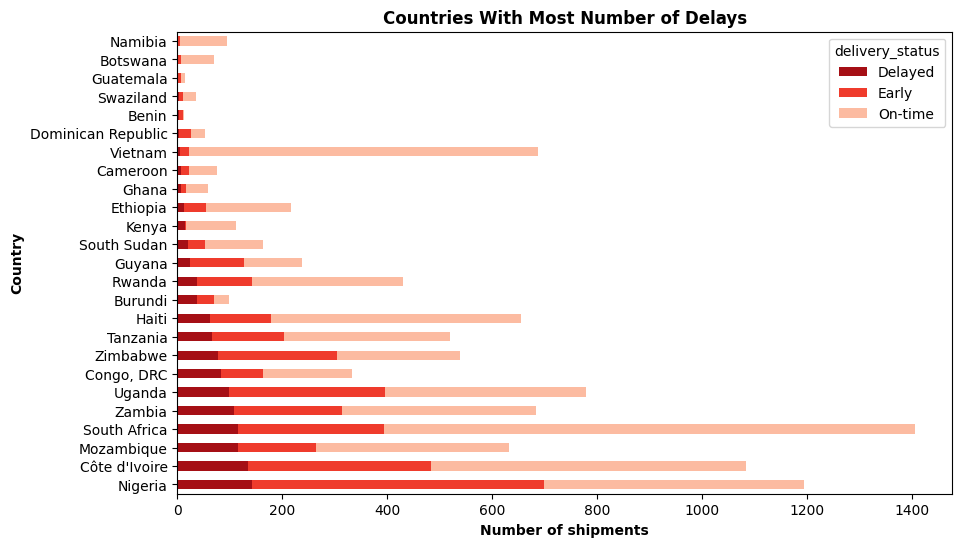

In [ ]:
# selecting top 25 rows
top_country_delays = country_status_delayed.head(25)
colors = ["#a50f15", "#ef3b2c", "#fcbba1" ]
# Plotting horizontal bar plot
top_country_delays.plot(
    kind="barh",
    stacked=True, # stacking bar plot
    color=colors, # passing custom color from colors list
    figsize=(10, 6)
)

plt.title("Countries With Most Number of Delays", fontweight = "bold")
plt.xlabel("Number of shipments", fontweight = "bold")
plt.ylabel("Country", fontweight = "bold")
plt.tick_params(axis='y', rotation=0)  # Rotate y-ticks if needed, since it's a horizontal bar chart
plt.show()

###### **Remarks**
- Nigeria has the most number of delayed shipments.
- followed by countries with higher amount of shipments.
- Delay trend is directly proportional to number of shipments.


#### Countries with most number of On-Time deliveries

In [ ]:
# grouping delivery status counts by country and  unstacking
country_status_ontime = df_clean.groupby("Country", observed = True)['delivery_status'].value_counts().unstack(fill_value=0)


In [ ]:
# sorting according to most number of on time deliveries
country_status_ontime = country_status_ontime.sort_values(by='On-time',ascending = False)

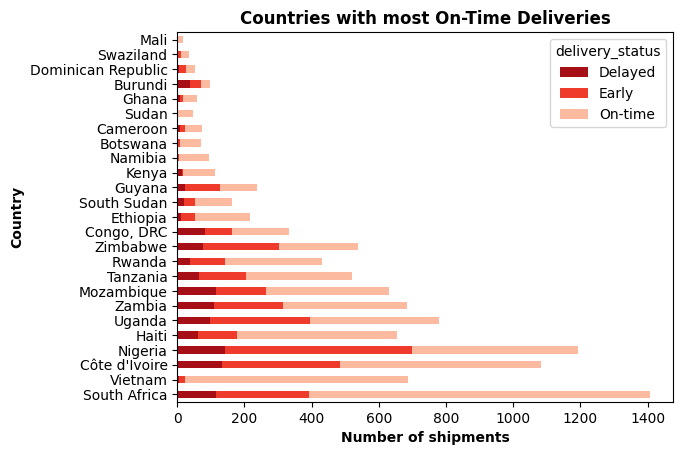

In [ ]:
# selecting the number of countries to plot
top_country_ontime = country_status_ontime.head(25)
colors = ["#a50f15", "#ef3b2c", "#fcbba1" ]

top_country_ontime.plot(
    kind="barh",# plotting bar horizontally
    color = colors,
    stacked=True )# stacking for readabillity

plt.title("Countries with most On-Time Deliveries", fontweight = "bold")
plt.xlabel("Number of shipments", fontweight = "bold")
plt.ylabel("Country", fontweight = "bold")
plt.tick_params(axis='y', rotation=0)  # Rotate y-ticks if needed, since it's a horizontal bar chart
plt.show()

###### **Remarks**
- South Africa has the most number of on-time deliveries followed by vietnam, cote d'lvoire ,Nigeria and Haiti as top 5 .
- On-Time delivery also are proportional to number of shipments.

#### **Delivery Performance Based on Transport mode**

In [ ]:
transport_mode = df_clean.groupby("Shipment Mode", observed=True)['delivery_status'].value_counts().unstack(fill_value=0)
transport_mode

delivery_status,Delayed,Early,On-time
Shipment Mode,,,
Air,591,1210,4672
Air Charter,75,452,123
Ocean,65,15,291
Truck,455,1137,1238


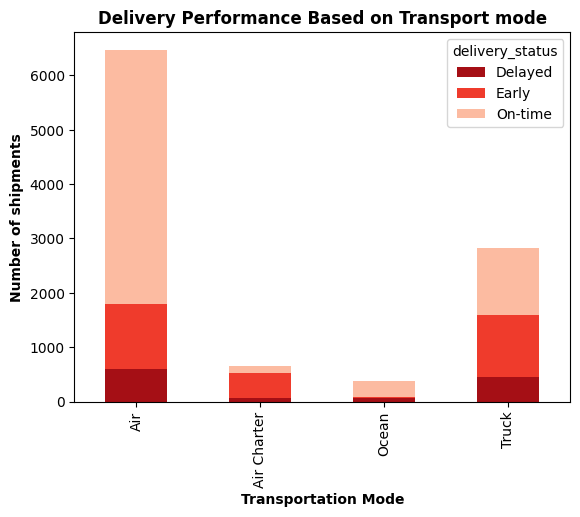

In [ ]:
colors = ["#a50f15", "#ef3b2c", "#fcbba1" ]
# plotting bar chart stacked vertically
transport_mode.plot(
    kind="bar",
    color = colors,
    stacked=True)
plt.title("Delivery Performance Based on Transport mode", fontweight = "bold")
plt.xlabel("Transportation Mode", fontweight = "bold")
plt.ylabel("Number of shipments", fontweight = "bold")
# applying tick parameters
plt.tick_params(axis='y', rotation=0)  # Rotate y-ticks if needed, since it's a horizontal bar chart
plt.show()

In [ ]:

# Calculate percentage of each delivery status
mode_percentage = transport_mode.div(transport_mode.sum(axis=1), axis=0) * 100
mode_percentage

delivery_status,Delayed,Early,On-time
Shipment Mode,,,
Air,9.130233,18.693033,72.176734
Air Charter,11.538462,69.538462,18.923077
Ocean,17.520216,4.043127,78.436658
Truck,16.077739,40.176678,43.745583


#### **Percentage of Delayed Deliveries by Shipment Mode**

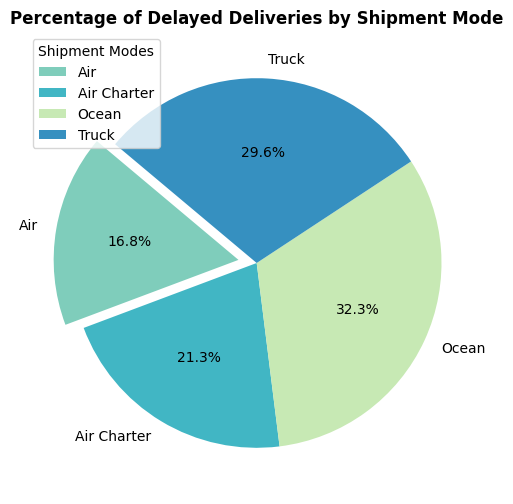

In [ ]:
# custom color list to pass
colors = ["#7fcdbb", "#41b6c4", "#c7e9b4", "#3690c0"]
plt.figure(figsize=(8, 6))

# Correcting explode to have 0.1 for each wedge
explode = [0.1, 0, 0, 0]

# Create the pie chart
plt.pie(mode_percentage['Delayed'],
        labels= mode_percentage.index,
        autopct='%1.1f%%', # percentage format
        startangle=140,
        colors=colors,
        textprops={"color": "black"},  # Changed to black for better visibility
        explode=explode)  # Adjust explode values

plt.title('Percentage of Delayed Deliveries by Shipment Mode', fontweight="bold")
plt.legend(transport_mode.index, title="Shipment Modes", loc="upper left")  # Add legend
plt.show()


###### **Remarks**
- Delivery delays is lowest in case of Air shipments(16.8%) and highest for ocean(32.3%)
- Air charter has a delay percentage of 21.3%
and truck has delay percentage of 29.6%.  

#### **Delivery Performance Based on Managing team**

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            10324 non-null  int32         
 1   Project Code                  10324 non-null  category      
 2   PQ #                          10324 non-null  category      
 3   PO / SO #                     10324 non-null  category      
 4   ASN/DN #                      10324 non-null  category      
 5   Country                       10324 non-null  category      
 6   Managed By                    10324 non-null  category      
 7   Fulfill Via                   10324 non-null  category      
 8   Vendor INCO Term              10324 non-null  category      
 9   Shipment Mode                 10324 non-null  category      
 10  PQ First Sent to Client Date  7643 non-null   datetime64[ns]
 11  PO Sent to Vendor Date      

In [ ]:
# grouping delivery status counts by country
managed_by_status = df_clean.groupby("Managed By", observed=True)['delivery_status'].value_counts().unstack(fill_value=0)
managed_by_status

delivery_status,Delayed,Early,On-time
Managed By,,,
Ethiopia Field Office,0,0,1
Haiti Field Office,0,0,1
PMO - US,1185,2814,6266
South Africa Field Office,1,0,56


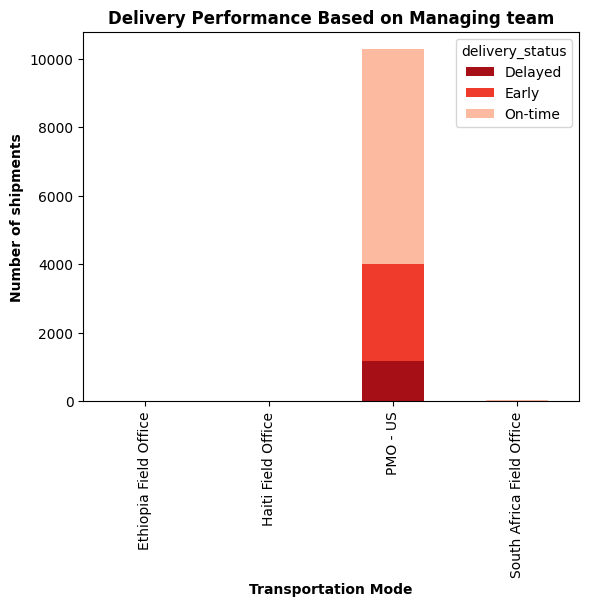

In [ ]:
# custom color list
colors = ["#a50f15", "#ef3b2c", "#fcbba1" ]
# stacked bar plot
managed_by_status.plot(
    kind="bar",
    color = colors,
    stacked=True)
plt.title("Delivery Performance Based on Managing team", fontweight = "bold")
plt.xlabel("Transportation Mode", fontweight = "bold")
plt.ylabel("Number of shipments", fontweight = "bold")
plt.tick_params(axis='y', rotation=0)  # passing tick parameters if required
plt.show()

###### **Remarks**
- Maximum of the deliveries were done by PMO-US so we dont have enough data to compare

#### **Covariance Between Insurance Cost And Weight**

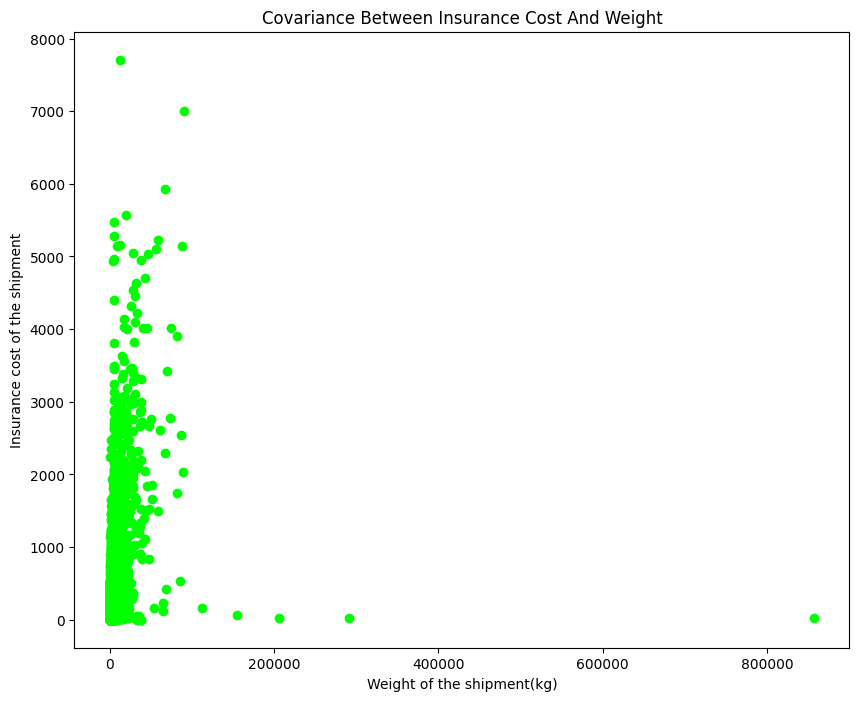

In [ ]:
# creating a pyplot figure
plt.figure(figsize=(10,8))
# scatter plot with dataframe df_clean passed directly as data
plt.scatter(data=df_clean, y='Line Item Insurance (USD)',x = "Weight (Kilograms)", color="lime")
plt.title('Covariance Between Insurance Cost And Weight')
plt.xlabel("Weight of the shipment(kg)")
plt.ylabel("Insurance cost of the shipment")
plt.show()

###### **Remarks**
- It seems that Insurance cost is not directly dependent on the weight of the shipment.

#### **Covariance Between Insurance Cost And Value of item**

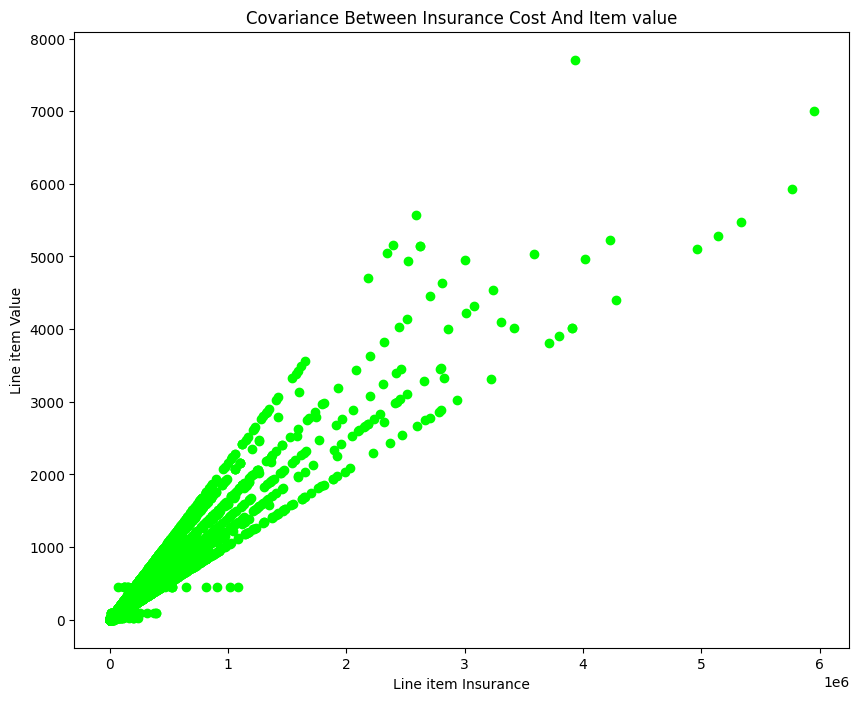

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(data=df_clean, y='Line Item Insurance (USD)',x = "Line Item Value", color="lime")
plt.title('Covariance Between Insurance Cost And Item value')
plt.xlabel("Line item Insurance")
plt.ylabel("Line item Value")
plt.show()

###### **Remarks**
- It is clearly visible that Insurance cost is directly proportional to line item value.
- Higher the value of goods higher the insurance cost.

In [ ]:
df_clean.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)', 'delivery_status'],
      dtype='object')

#### **Covariance Between Freight Cost And Weight (Kilograms)**

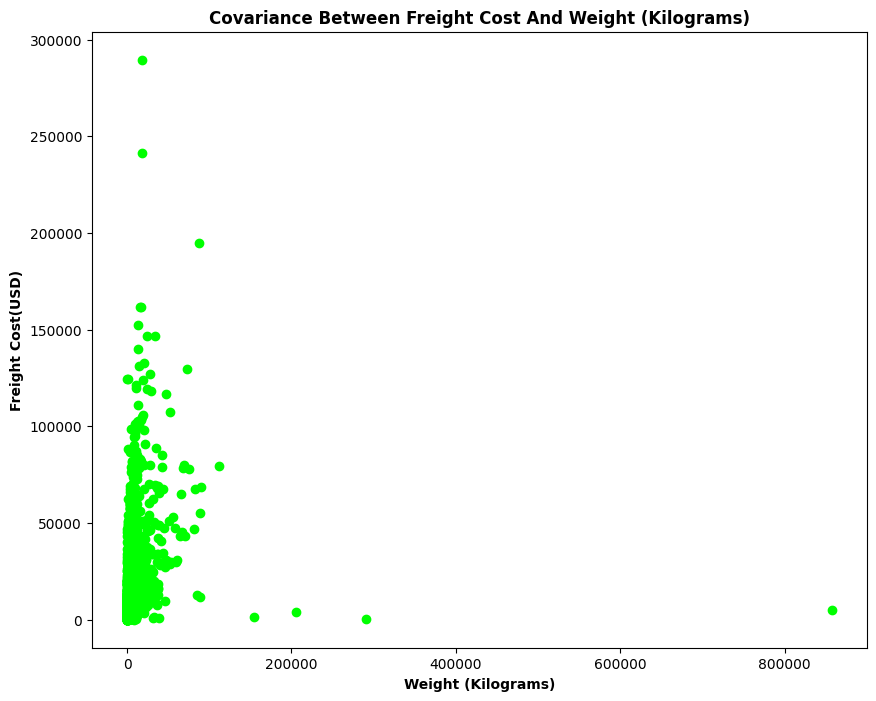

In [ ]:
# creating a pyplot figure
plt.figure(figsize=(10,8))
# scatter plot between freight cost and weight of shipment
plt.scatter(data=df_clean, y='Freight Cost (USD)',x = "Weight (Kilograms)", color="lime")
plt.title('Covariance Between Freight Cost And Weight (Kilograms)', fontweight = "bold")
plt.xlabel("Weight (Kilograms)", fontweight = "bold")
plt.ylabel("Freight Cost(USD)", fontweight = "bold")
plt.show()

#### **Covariance Between Freight Cost And Line item value**

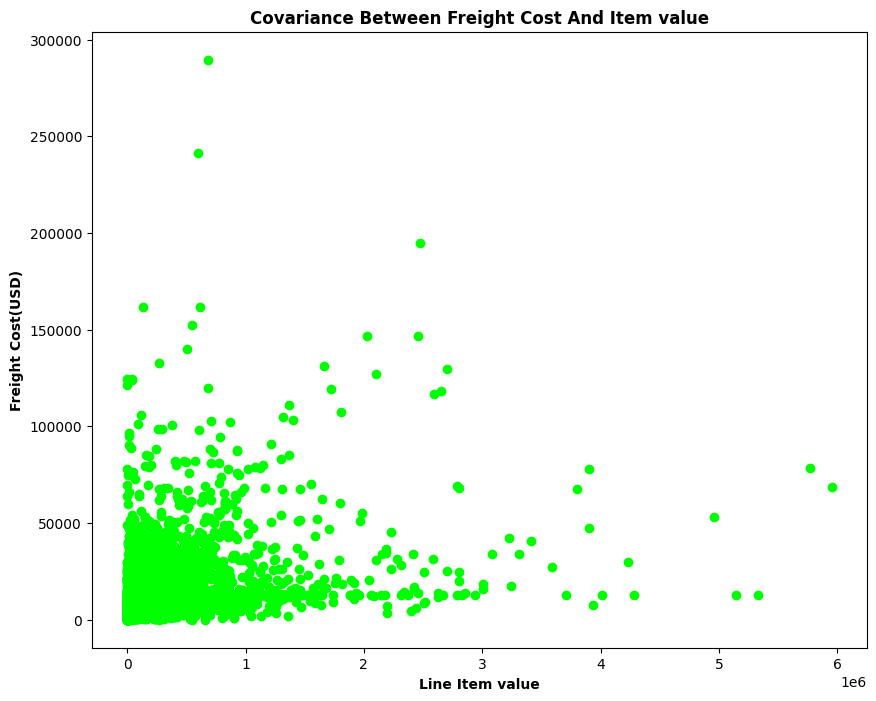

In [ ]:
plt.figure(figsize=(10,8))
# scatter plot between freight cost and line item value
plt.scatter(data=df_clean, y='Freight Cost (USD)',x = "Line Item Value", color="lime")
plt.title('Covariance Between Freight Cost And Item value', fontweight = "bold")
plt.xlabel("Line Item value", fontweight = "bold")
plt.ylabel("Freight Cost(USD)", fontweight = "bold")
plt.show()

###### **Remarks**
- It is evident that Weight of the shipment has no significant effect on the freight cost.
- Line item value has some effect on the freight cost

#### **Median Freight Cost by Shipment Mode**

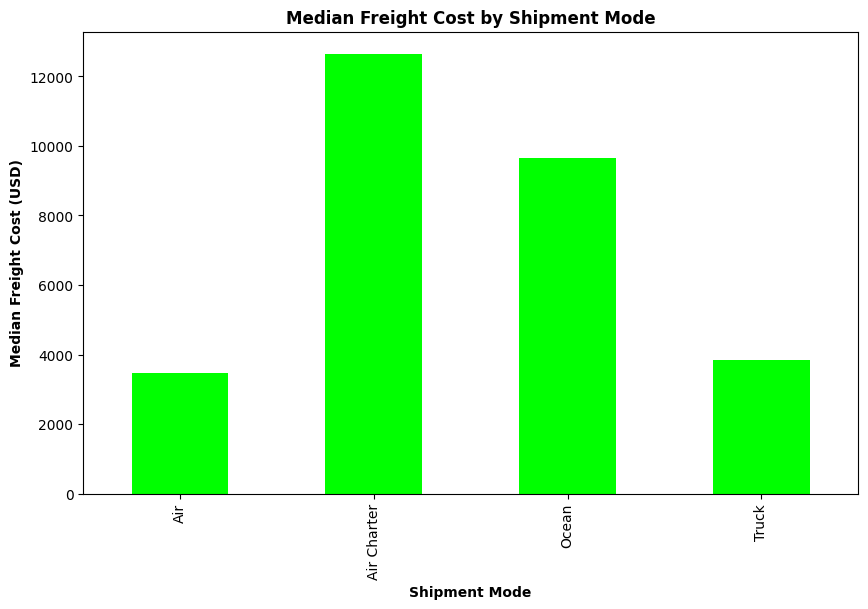

In [ ]:
# Calculating mean or median freight cost by Shipment Mode
freight_cost_by_mode = df_clean.groupby('Shipment Mode',observed = True)['Freight Cost (USD)'].median()

plt.figure(figsize=(10, 6))
freight_cost_by_mode.plot(kind='bar', color= "lime")
plt.title("Median Freight Cost by Shipment Mode", fontweight = "bold")
plt.xlabel("Shipment Mode",fontweight ="bold")
plt.ylabel("Median Freight Cost (USD)",fontweight ="bold")
plt.show()


###### **Remarks**
- Air Charter has the highest median freight cost.
- Ocean is at second.
- Truck is third and Air is cheapest.


#### **INCO Terms Dependence On Delivery Time**

In [ ]:
df_clean['Vendor INCO Term'].unique()

['EXW', 'FCA', 'DDU', 'CIP', 'DDP', 'CIF', 'N/A - From RDC', 'DAP']
Categories (8, object): ['CIF', 'CIP', 'DAP', 'DDP', 'DDU', 'EXW', 'FCA', 'N/A - From RDC']

In [ ]:
# grouping delivery status counts by inco term
inco_term = df_clean.groupby("Vendor INCO Term", observed=True)['delivery_status'].value_counts().unstack(fill_value=0)
inco_term

delivery_status,Delayed,Early,On-time
Vendor INCO Term,,,
CIF,0,0,3
CIP,1,6,268
DAP,0,0,9
DDP,116,279,1048
DDU,0,1,14
EXW,138,117,2523
FCA,4,2,391
N/A - From RDC,927,2409,2068


<Figure size 1000x600 with 0 Axes>

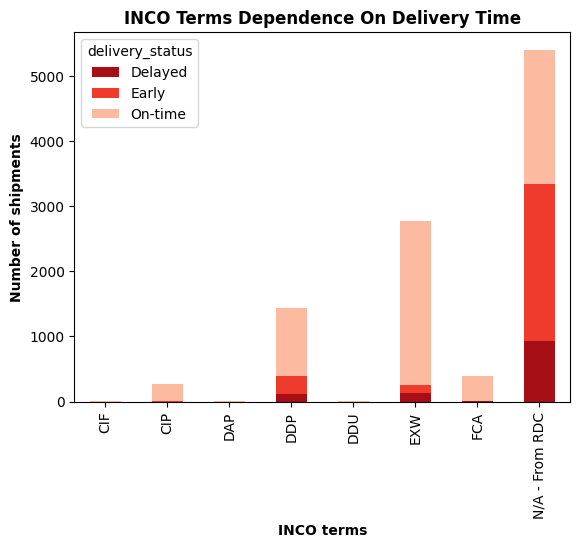

In [ ]:
# creating a pyplot figure
plt.figure(figsize=(10,6))
# plotting stacked bar chart for comparision
inco_term.plot(kind='bar', stacked=True, color = colors)
plt.title("INCO Terms Dependence On Delivery Time", fontweight = "bold")
plt.xlabel("INCO terms", fontweight = "bold")
plt.ylabel("Number of shipments", fontweight = "bold")
plt.show()

###### **Remarks**
- N/A From RDC caused most of the shipment delays but that maybe due to the fact that the most shipments are follow this inco term.
- followed by EXW and DDP, this sequence is same as the most number of shipments by each inco term.

#### **Dependence of time taken to prepare for delivery on delivery performance**

In [ ]:
df_clean['PO Sent to Vendor Date'].isnull().sum()


5732

In [ ]:
# creating a new df with dropped na rows
df_po = df_clean.dropna(subset=['PO Sent to Vendor Date']).copy()
df_po.describe()

,ID,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
count,4592.000000,3842,4592,4592,4592,4592,4592.000000,4592.000000,4.592000e+03,4592.000000,4592.000000,4592.000000,4592.000000,4592.000000
mean,40789.926176,2012-08-12 04:15:59.500260352,2012-01-25 07:21:13.170732032,2012-05-10 01:10:33.449477376,2012-05-09 20:45:34.494773248,2012-05-11 14:46:49.756097536,81.564895,11702.336019,1.155071e+05,34.166611,1.043974,1509.393066,8422.100586,178.626068
min,47.000000,2009-01-04 00:00:00,2006-04-19 00:00:00,2006-06-27 00:00:00,2006-06-27 00:00:00,2006-06-27 00:00:00,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.750000,0.000000
25%,20495.000000,2011-01-13 00:00:00,2010-02-04 00:00:00,2010-05-21 00:00:00,2010-05-27 12:00:00,2010-05-27 12:00:00,30.000000,132.000000,2.503600e+03,6.650000,0.110000,42.000000,1193.150024,3.525000
50%,40946.000000,2013-01-12 12:00:00,2012-06-07 00:00:00,2012-08-07 00:00:00,2012-08-07 12:00:00,2012-08-07 12:00:00,60.000000,1428.500000,2.153136e+04,19.550000,0.340000,285.000000,3478.000000,32.290001
75%,62160.250000,2014-04-01 00:00:00,2014-04-30 00:00:00,2014-07-29 00:00:00,2014-07-29 00:00:00,2014-08-05 00:00:00,100.000000,7729.250000,1.496286e+05,36.160000,0.800000,1556.500000,10218.212158,215.365002
max,82256.000000,2015-07-07 00:00:00,2015-08-24 00:00:00,2015-09-14 00:00:00,2015-09-14 00:00:00,2015-09-14 00:00:00,1000.000000,515000.000000,2.801262e+06,1345.640015,41.680000,154780.000000,289653.187500,4939.200195
std,24203.951367,NaN,NaN,NaN,NaN,NaN,90.562735,31571.602350,2.107119e+05,61.253578,3.332927,3638.304199,13876.432617,335.518219


In [ ]:
# creating new time taken to schedule the delivery column
df_po['time_to_schedule'] = df_po['Scheduled Delivery Date'] - df_po['PO Sent to Vendor Date']


In [ ]:
# converting to numeric days
df_po['time_to_schedule'] = df_po['time_to_schedule'].dt.days

In [ ]:
df_po[['time_to_schedule','PO Sent to Vendor Date']]

,time_to_schedule,PO Sent to Vendor Date
9,78,2006-11-13
10,77,2006-12-01
13,67,2006-12-22
15,68,2007-01-10
18,55,2007-04-12
...,...,...
6575,27,2015-08-04
6576,121,2010-10-18
6577,128,2014-08-11
6578,65,2013-02-05


In [ ]:
# Drop rows where 'time_to_schedule' is less than 0
df_po = df_po[df_po['time_to_schedule'] >= 0].dropna()


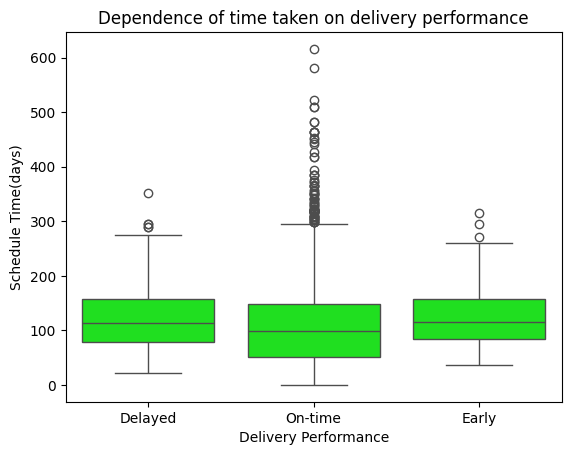

In [ ]:

sns.boxplot(data=df_po, x="delivery_status", y="time_to_schedule", color = "lime")
plt.title("Dependence of time taken on delivery performance")
plt.xlabel("Delivery Performance")
plt.ylabel("Schedule Time(days)")
plt.show()


###### **Remarks**
- The time taken to schedule or prepare for delivery is fairly similar for delayed ontime or early delivery however some outliers suggest that on time deliveries have taken more time to schedule.

#### **Delivery Performance by Product Group**

In [ ]:
# creating a pivot table to plot a heatmap

pivot_table = df_clean.pivot_table(index='Product Group',
                                    columns='delivery_status',
                                    aggfunc='size',
                                    observed = True,
                                    fill_value=0)

# Display the pivot table
print(pivot_table)

delivery_status  Delayed  Early  On-time
Product Group                           
ACT                    0      1       15
ANTM                   0      1       21
ARV                 1073   2707     4770
HRDT                 113    105     1510
MRDT                   0      0        8


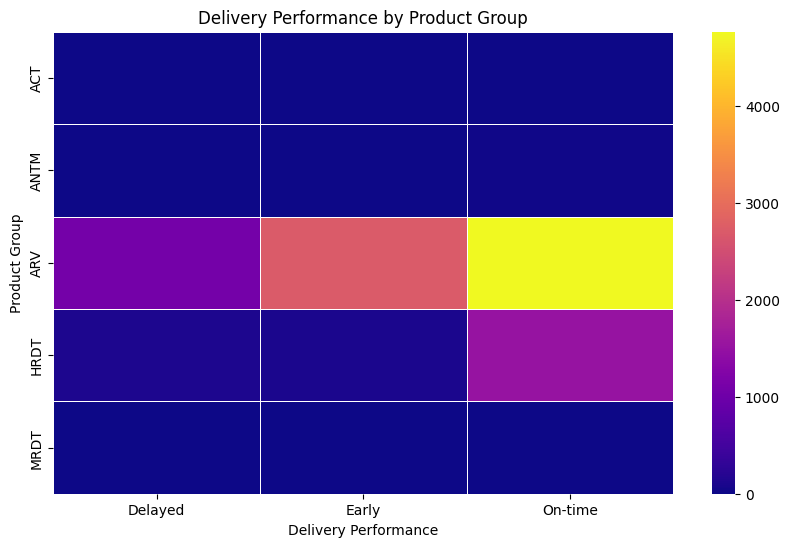

In [ ]:
# plotting a heatmap
# creating pyplot figure
plt.figure(figsize=(10,6))
# using seaborn and colormap plasma
sns.heatmap(pivot_table, cmap='plasma', linewidths=0.5)
plt.title('Delivery Performance by Product Group')
plt.xlabel('Delivery Performance')
plt.ylabel('Product Group')
plt.show()

###### **Remarks**
- It shows ARV product group has most deliveries on time. But this group also has the most shipments so trend is not clear.

#### ***Answer to our questions/assumptions***

1. Do some countries face more delays than others.
  > Yes countries for eg Nigeria face more delays than others.But it may be dependent on the volume of shipments.

2. How the mode of shipment affect delivery time.
  > Delays are lowest in air shipments (16.8%) and highest in ocean shipments (32.3%).

3. Are shipments managed by specific teams more likely to reach on time.
  > Yes, Shipment managed by PMO- US has most on time deliveries. But most of deliveries were done by them so we dont have enough data for valid conclusion.

4. Which factor is responsible for increasing line item insurance cost.
  > Line item value is responsible for increasing insurance costs.

5. Which factor is responsible for increasing freight cost.
  > Most significant factor is Transport mode.(Air is cheapest, Air charter is costliest)
   - Line item value also has some affect on freight cost.
   - Weight of the shipment according to this data has not significant affect.
6. Does the type of INCO term impact delivery.
  > Not significantly, N/A - From RDC" has the most delays, possibly due to highest shipment volumes.

7. How the delivery performance varies with the time taken for scheduling delivery.
  > Outliers suggest that in some special cases/shipments performance is good if time taken is more . but for most common cases it does not depend on time taken.

### **Summary of Key Findings**

1. **Country Overview**
   - **Top Shipment Destinations**: South Africa, Nigeria, Côte d'Ivoire, Uganda, and Vietnam receive the highest shipments, with the majority going to **African countries**, likely due to limited pharmaceutical availability.
   - **Lower Shipment Volumes**: Countries like Swaziland have fewer shipments, potentially due to domestic pharmaceutical availability or proximity to nations like Mexico that have sufficient pharmaceutical resources.

2. **INCO Terms**
   - **Common Terms**: "N/A - From RDC" is the most used, facilitating faster regional distribution. EXW and DDP follow, supporting independent logistics and all-inclusive delivery, respectively.

3. **Shipment Mode**
   - **Popular Modes**: Air and Truck shipments dominate, offering flexibility and faster service.

4. **Product Groups**
   - **Primary Products**: ARV (HIV/AIDS treatment) and HRDT (high-risk disease treatment, e.g., TB, malaria) are the top groups, highlighting a focus on infectious diseases.

5. **Other Findings**
   - **Subclassification**: Most shipments are categorized under Adult, Pediatric, and AIDS test groups.
   - **Dosage Form**: Tablets lead, followed by FDC tablets, test kits, capsules, and oral solutions.
   - **First-Line Designation**: About 70% of shipments are first-line products.
   - **Vendor Distribution**: SCMS from RDC handles over half the shipments, followed by Orgenics, S. BUYS, and Aurobindo Pharma, each with around 7-8% of total orders.

6. **Statistical Observations**
   - **Data Skewness**: Right-skewed distributions exist due to high-value outliers, primarily affecting freight cost and weight.
   - **Unit of Measure Outliers**: These outliers indicate valid trends rather than errors, correlating with higher freight and insurance costs.
   - **Relationship Between Variables**: Correlations show that higher values, such as weight, often align with increased costs.

7. **Delivery Insights**
   - **Country Delays**: Nigeria has the most delays, consistent with higher shipment volumes.
   - **On-Time Deliveries**: South Africa, Vietnam, Côte d'Ivoire, Nigeria, and Haiti lead in timely deliveries.
   - **Mode-Specific Delays**: Delays are least frequent in air shipments (16.8%) and most frequent in ocean shipments (32.3%).
   - **Team Impact**: PMO-US manages the majority of deliveries, limiting comparative analysis.

8. **Insurance Insights**
   - **Cost Factors**: Insurance costs correlate strongly with line item value, though weight has limited impact.

9. **INCO Term and Delivery Delays**
   - **Delay Trends**: "N/A - From RDC" has the highest delays, reflecting its high volume. EXW and DDP follow similarly.

10. **Scheduling Analysis**
   - **Time to Schedule**: Scheduling times are similar across delivery statuses, with on-time deliveries occasionally taking longer due to shipment volume.

11. **Product Group Delivery Timeliness**
   - **ARV Group**: ARV shipments are typically on time, but this may be linked to their higher shipment frequency.

12. **Freight Cost Dependence**
    - **Factors**: Freight cost is influenced by shipment mode, with Air being the cheapest, followed by Truck. Air Charter is the most expensive.
    - **Limited Impact**: Weight does not significantly affect freight cost, but line item value does.

---

### **Business Recommendations**

1. **Increase Efficiency in High-Volume Areas**: Given the delays in Nigeria and other top destinations, consider optimizing logistics or partnering with local distributors.
2. **Review INCO Terms**: Analyze whether more efficient INCO terms, such as DDP, could streamline shipments for buyers without advanced logistics.
3. **Optimize Shipment Mode**: Use Air for time-sensitive shipments and explore cost-effective truck options for regions where delays are manageable.
4. **Vendor Strategy**: Maintain strong partnerships with top vendors like SCMS but diversify to mitigate risks.
5. **Monitor Outliers**: Keep an eye on high-value shipments and ensure insurance and freight costs are optimized.


-Export the dataset

In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('drive')
df_clean.to_csv('FedxLogisticsClean.csv')
files.download('FedxLogisticsClean.csv')

Mounted at drive


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>